## Early Detection of Depression
### Purpose of this project
Major depressive disorder (MDD) is a chronic, common disorder among adolescents, with lifetime recurrence rates estimated at about 70%, and most (40–60%) recurring within 2 years. Within the last ten years, depression has undoubtedly been on the rise, impacting children, adolescents, and adults. Adolescents are particularly vulnerable to depression, with a sixty-three percent increase from 2013 to 2016. This situation was only worsened with the advent of COVID, with a 25% increase in anxiety and depression worldwide. However, early signs of depression often go unnoticed among adolescents; moreover fears of stigmatization and social rejection and concerns over a lack of confidentiality impose additional barriers for them to seek help from adults or primary care providers. Therefore, a quick and less destructive approach to early detection of depression in adolescents is of paramount importance. This project aims to apply machine learning on relatively-easy-to-collect data such as Electronic Health Records (EHR), demographics and personal lifestyle, analyzing the relationships between these data and the potential symptoms of depressive disorders. 

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.stats import chi2_contingency

### Problem Framing
A machine learning model learns the complex relationships (aka patterns) from historically observed data and relationaships can be used to make predictions on new data. The data used in this project was from a mandatory medical visit for undergraduate students at Nice University, France. Both information about the life style and electronic health data were collected. A medical assessment was carried out on each student to determine the potential symptoms of depression, anxiety and panic. The diagnosis related to depression is going to be the target feature for this project. In other words, the relationship between "depression" and life style and EHD will be learned by various machine learning models. This relationship can potentially assist the diagnosis of depression symptoms for future students.

- Target = "Depressive Symptoms"
- It has two levels: yes and no
- A binary classification model will be built.

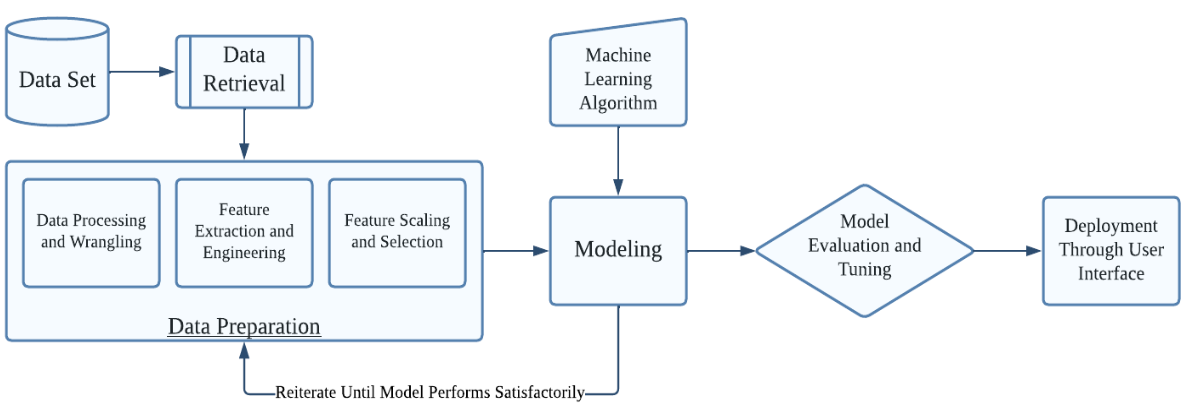

In [7]:
import sklearn.feature_selection
sklearn.__version__

'1.2.1'

### Exploratory Data Analysis

Getting a general sense of the data including variables and their types (quantitative and qualitative), how many have missing values, which are related, etc. 

#### Reading in the Data

In [4]:
df = pd.read_excel('database(well-being of students in Nice).xls')
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#### Preview of Data


Getting a more detailed sense of the data: number of rows and columns, number of entries (university students studied), the data type the variable is stored as, and how many variable contain missing values.

- Using pd.set_option("display.max_columns", None) to make sure all columns are shown in the preview.
- df.head() shows the first 5 rows of the data.

Both numeric (e.g., "Weight", "Height", "Heart rate") and categorical (e.g., "Gender", "French Nationality") features are observed in the data.

In [5]:
pd.set_option('display.max_columns', None)
df.head()

Age (4 levels)  Gender French nationality Field of study Year of university  \
0    20 and more  female                yes     humanities             second   
1             19  female                yes     humanities             second   
2    20 and more  female                yes     humanities             second   
3             19  female                yes     humanities             second   
4             18  female                yes     humanities             second   

  Learning disabilities Difficulty memorizing lessons Professional objective  \
0                    no                            no                    yes   
1                    no                            no                    yes   
2                    no                            no                    yes   
3                    no                            no                    yes   
4                    no                            no                    yes   

  Informed about opportunities Satisfied with living conditions  \
0                          yes                              yes   
1                          yes                              yes   
2                          yes                              yes   
3                          yes                              yes   
4                          yes                              yes   

  Living with a partner/child Parental home Having only one parent  \
0                          no            no                     no   
1                          no           yes                     no   
2                          no            no                    yes   
3                          no            no                     no   
4                          no            no                     no   

  At least one parent unemployed Siblings Long commute  \
0                             no      yes           no   
1                             no       no          yes   
2                             no      yes           no   
3                             no       no           no   
4                             no      yes           no   

     Mode of transportation Financial difficulties Grant Additional income  \
0                   on foot                     no   yes                no   
1  by public transportation                     no   yes                no   
2                    by car                     no   yes               yes   
3                   on foot                     no   yes                no   
4                   on foot                     no   yes                no   

  Public health insurance  Private health insurance  C.M.U.  \
0                      yes                        no     no   
1                      yes                       yes     no   
2                      yes                       yes     no   
3                      yes                       yes     no   
4                      yes                       yes     no   

  Irregular rhythm of meals Unbalanced meals Eating junk food On a diet  \
0                       yes               no              yes        no   
1                        no               no              yes        no   
2                       yes               no              yes        no   
3                        no               no              yes        no   
4                        no               no              yes        no   

  Irregular rhythm or unbalanced meals Physical activity(3 levels)  \
0                                  yes                   regularly   
1                                   no                   regularly   
2                                  yes                          no   
3                                   no                          no   
4                                   no                          no   

   Physical activity(2 levels)  Weight (kg)  Height (cm)  \
0                    regularly         62.0        165.0   
1                    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age (4 levels)                                  4184 non-null   object 
 1   Gender                                          4184 non-null   object 
 2   French nationality                              4184 non-null   object 
 3   Field of study                                  4184 non-null   object 
 4   Year of university                              4184 non-null   object 
 5   Learning disabilities                           4184 non-null   object 
 6   Difficulty memorizing lessons                   4184 non-null   object 
 7   Professional objective                          4184 non-null   object 
 8   Informed about opportunities                    4184 non-null   object 
 9   Satisfied with living conditions         

df.info() allows for more information about the data to be displayed.

I can see some basic information, such as the number of rows and columns, being 4184 and 62 respectively. Seeing how the data was structured from running df.head() previously, I recognized that there were 4184 university students that are a part of this data, and that their information was tracked trough 62 different variables.

In [8]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0] #LIST COMPREHENSION
print (vars_with_na)

['Satisfied with living conditions', 'Parental home', 'Having only one parent', 'Long commute', 'Mode of transportation', 'Private health insurance ', 'Weight (kg)', 'Height (cm)', 'Overweight and obesity', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Prehypertension or hypertension', 'Heart rate (bpm)', 'Abnormal heart rate', 'Vaccination up to date', 'Cigarette smoker (5 levels)', 'Cigarette smoker (3 levels)', 'Drinker (3 levels)', 'Drinker (2 levels)', 'Marijuana use', 'Other recreational drugs']


As seen from the Non-Null Count, there are 21 variables that have some number of missing values. This is important to take into consideration because they may be crucial in the determining of a trend or relationship. 

Additionally, I found a list of variables with missing values: ['Satisfied with living conditions', 'Parental home', 'Having only one parent', 'Long commute', 'Mode of transportation', 'Private health insurance ', 'Weight (kg)', 'Height (cm)', 'Overweight and obesity', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Prehypertension or hypertension', 'Heart rate (bpm)', 'Abnormal heart rate', 'Vaccination up to date', 'Cigarette smoker (5 levels)', 'Cigarette smoker (3 levels)', 'Drinker (3 levels)', 'Drinker (2 levels)', 'Marijuana use', 'Other recreational drugs']

In [9]:
df.describe()

Weight (kg)  Height (cm)  Systolic blood pressure (mmHg)  \
count  3994.000000  3997.000000                     3032.000000   
mean     64.105158   170.120090                       11.368206   
std      12.718453     9.062628                        1.125397   
min      38.000000   146.000000                        8.000000   
25%      55.000000   163.000000                       11.000000   
50%      62.000000   169.000000                       11.000000   
75%      70.000000   177.000000                       12.000000   
max     142.000000   198.000000                       17.000000   

       Diastolic blood pressure (mmHg)  Heart rate (bpm)  \
count                      3111.000000       3798.000000   
mean                          6.746030         73.649552   
std                           0.941977         11.282012   
min                           4.000000         40.000000   
25%                           6.000000         65.000000   
50%                           7.000000         73.000000   
75%                           7.000000         80.000000   
max                          11.000000        124.000000   

       Distant visual acuity of right eye (score /10)  \
count                                     4184.000000   
mean                                         9.803537   
std                                          0.936485   
min                                          2.000000   
25%                                         10.000000   
50%                                         10.000000   
75%                                         10.000000   
max                                         12.000000   

       Distant visual acuity of left eye (score /10)  \
count                                    4184.000000   
mean                                        9.832218   
std                                         0.795970   
min                                         1.000000   
25%                                        10.000000   
50%                                        10.000000   
75%                                        10.000000   
max                                        12.000000   

       Close visual acuity of right eye (score /10)  \
count                                   4184.000000   
mean                                       9.989723   
std                                        0.188453   
min                                        4.000000   
25%                                       10.000000   
50%                                       10.000000   
75%                                       10.000000   
max                                       12.000000   

       Close visual acuity of left eye (score /10)        noise  
count                                  4184.000000  4184.000000  
mean                                      9.989723     0.499841  
std                                       0.188453     0.287611  
min                                       4.000000     0.000119  
25%                                      10.000000     0.255551  
50%                                      10.000000     0.500743  
75%                                      10.000000     0.744422  
max                                      12.000000     0.999131

Using the df.describe() function shows the mean, median, std, and other important statistics for all quantitative variables. 

#### Univariate and Bivariate Distributions for Numerical Features


Check the summary statistics and univariate distribution of all the numeric features
The histogram for each numeric feature was also plotted. A few observations:

- name of the funtion: draw_histograms
- df --- the name of the data frame
- variables --- list of variable names to plot
- n_rows & n_cols --- Number of rows and columns the plots are arranged
- dtype --- indicates the type of the variables to be plotted, "Cat" or "Num"
- uni_bivariate --- indicates the type of the distributions, 1 = Univariate, 2 = bivariate

In [10]:
def draw_histograms(df, variables, n_rows, n_cols, dtype, uni_bivariate):
    fig=plt.figure(figsize = (5 * n_cols, 5 * n_rows), dpi = 200)
#     plt.grid()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if dtype == "Cat":
            if uni_bivariate == 1:
#               df[var_name].value_counts().plot(kind = "bar", ax=ax)
                sns.countplot(data = df, x = var_name, ax = ax)
            else:
                sns.countplot(data = df, x = var_name, hue = "Depressive symptoms", ax = ax)
            ax.set_title(var_name+" Frequency")
        else:
            if uni_bivariate == 1:
#               df[var_name].hist(bins=15, ax=ax)
                sns.histplot(data = df, x = var_name, bins = 15, ax = ax)
            else:
                sns.histplot(data = df, x = var_name, bins = 15, hue = "Depressive symptoms", ax = ax)
            ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
#Originally had it set up like this
'''
sns.histplot(data=df, x="Weight (kg)")
sns.histplot(data=df, x="Height (cm)")
sns.histplot(data=df, x="Systolic blood pressure (mmHg)")
sns.histplot(data=df, x="Diastolic blood pressure (mmHg)")
sns.histplot(data=df, x="Heart rate (bpm)")
sns.histplot(data=df, x="Distant visual acuity of right eye (score /10)")
sns.histplot(data=df, x="Distant visual acuity of left eye (score /10)")
sns.histplot(data=df, x="Close visual acuity of right eye (score /10)")
'''

'\nsns.histplot(data=df, x="Weight (kg)")\nsns.histplot(data=df, x="Height (cm)")\nsns.histplot(data=df, x="Systolic blood pressure (mmHg)")\nsns.histplot(data=df, x="Diastolic blood pressure (mmHg)")\nsns.histplot(data=df, x="Heart rate (bpm)")\nsns.histplot(data=df, x="Distant visual acuity of right eye (score /10)")\nsns.histplot(data=df, x="Distant visual acuity of left eye (score /10)")\nsns.histplot(data=df, x="Close visual acuity of right eye (score /10)")\n'

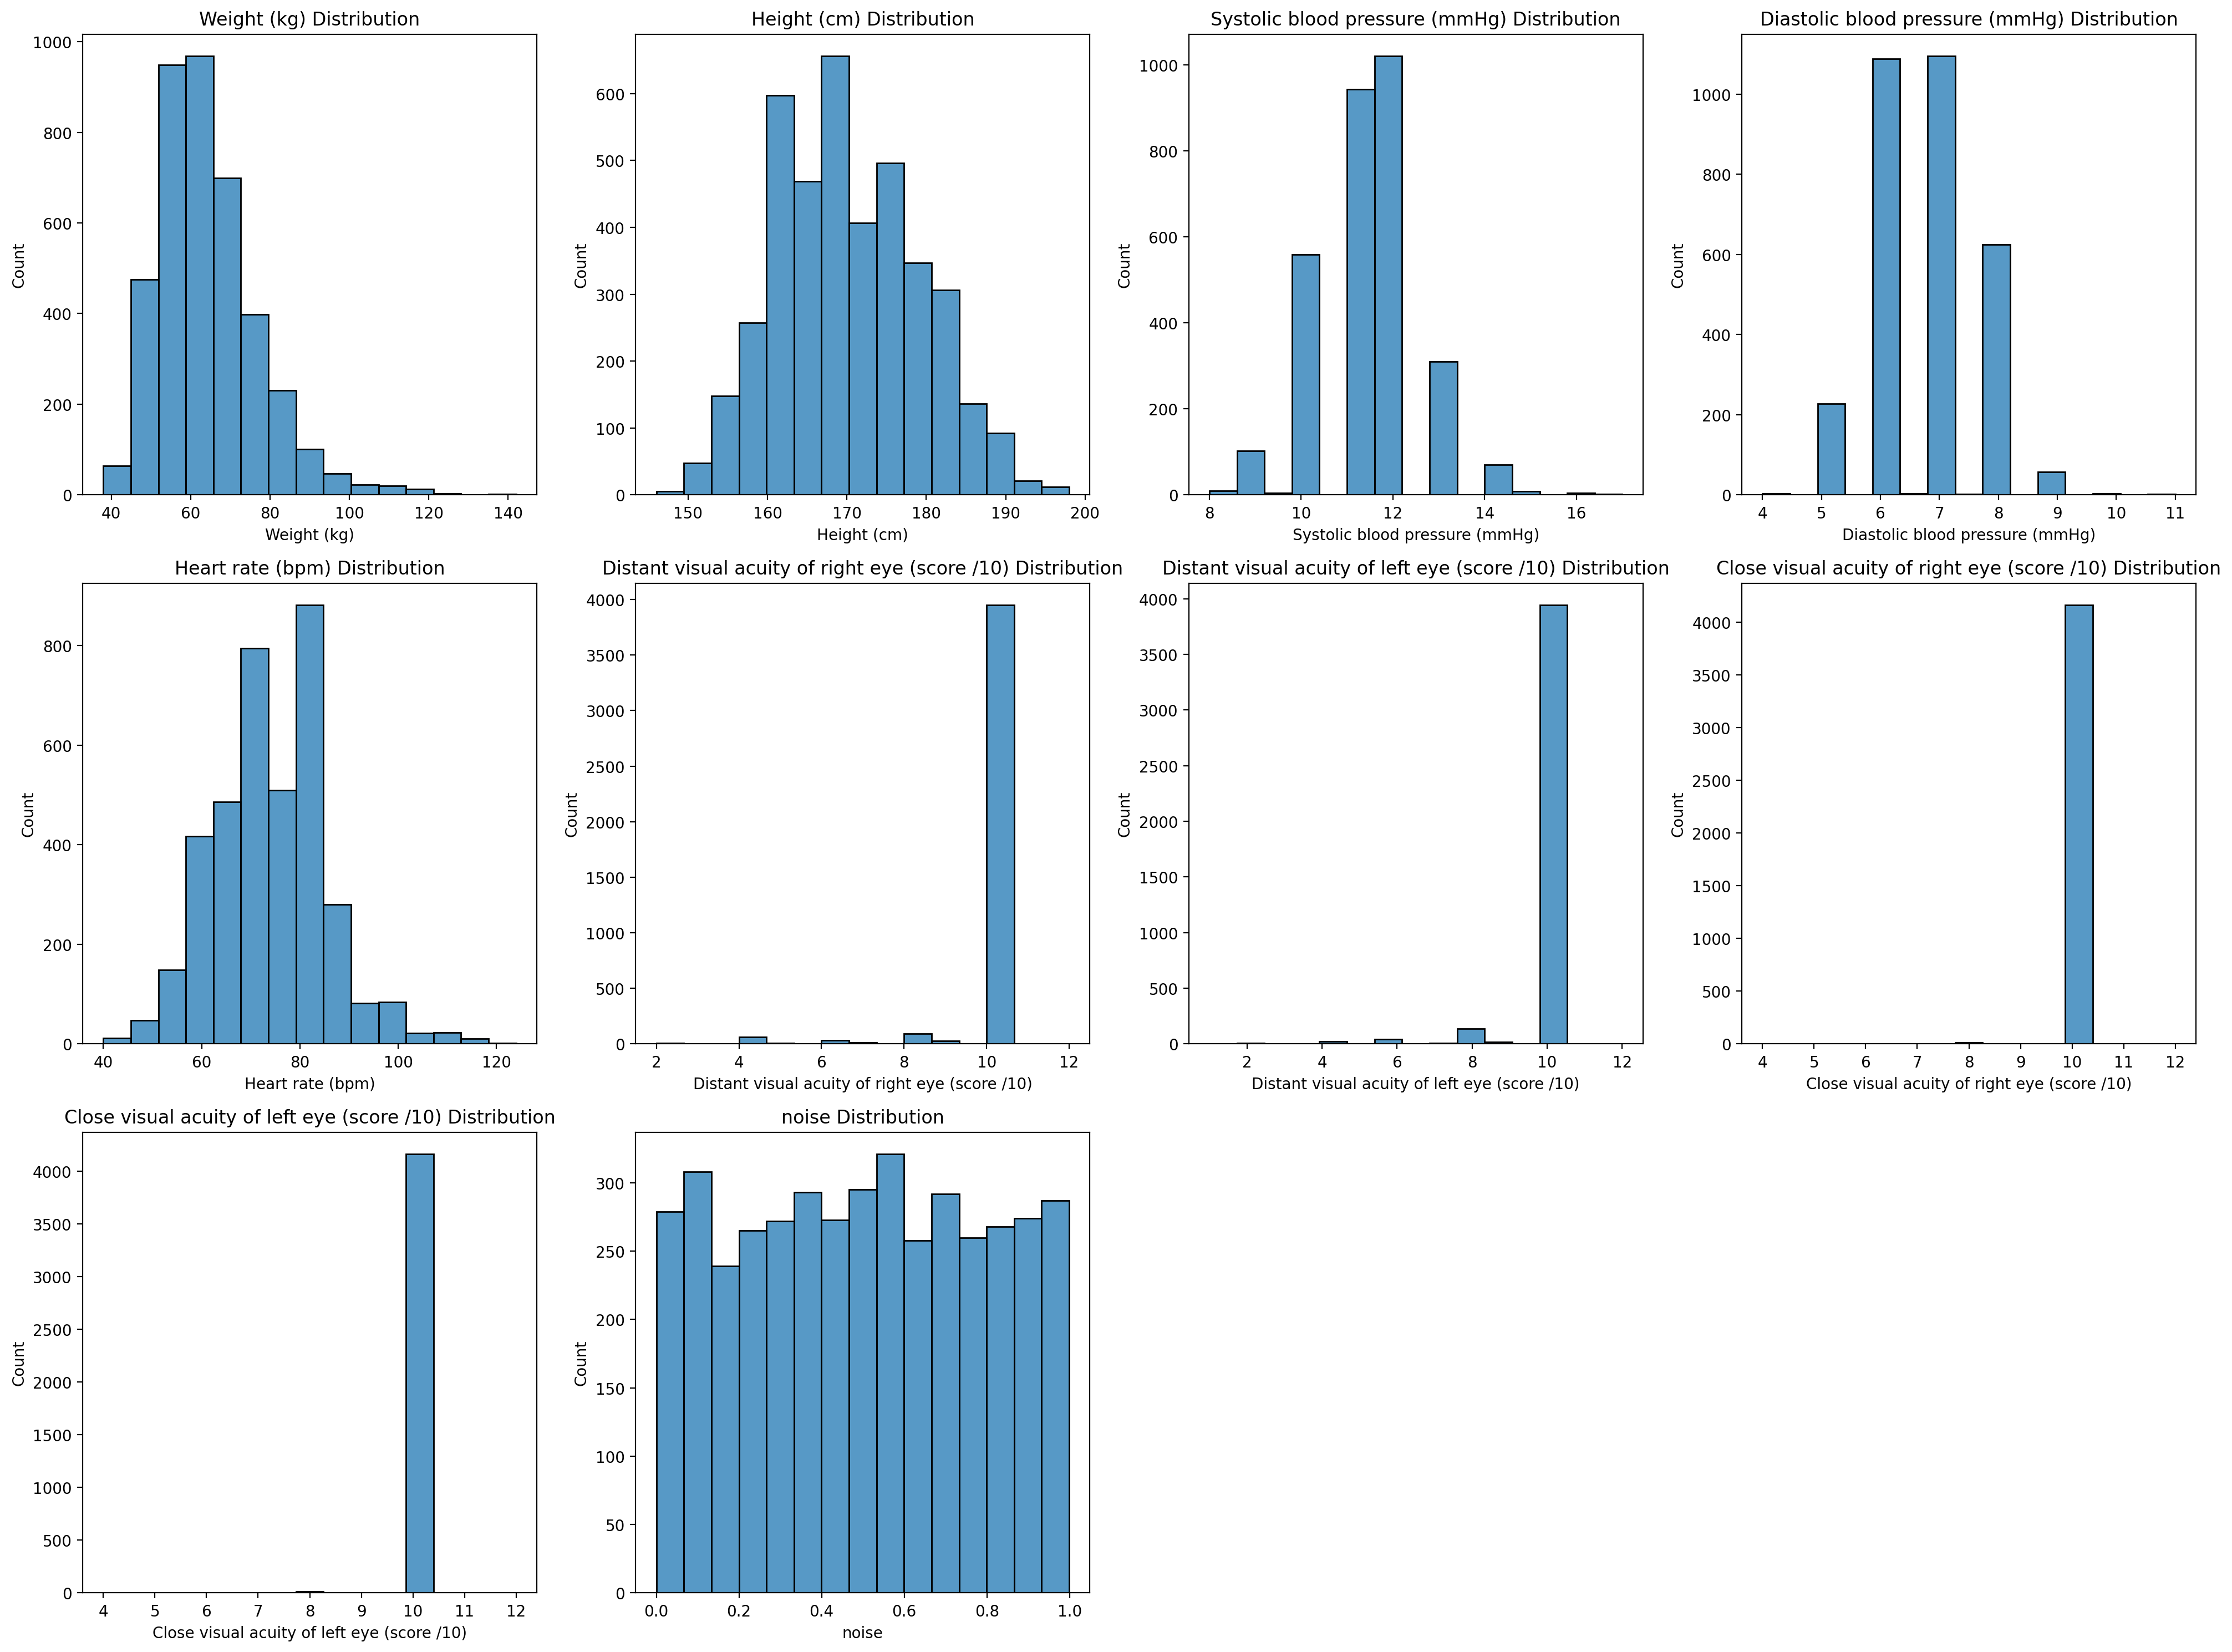

In [11]:
%%capture --no-display
draw_histograms(df, num_cols, 3, 4, dtype = "Num", uni_bivariate = 1)

In [12]:
fig=plt.figure
fig

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [13]:
draw_histograms(df, cat_cols, 14, 4, "Cat", 1)

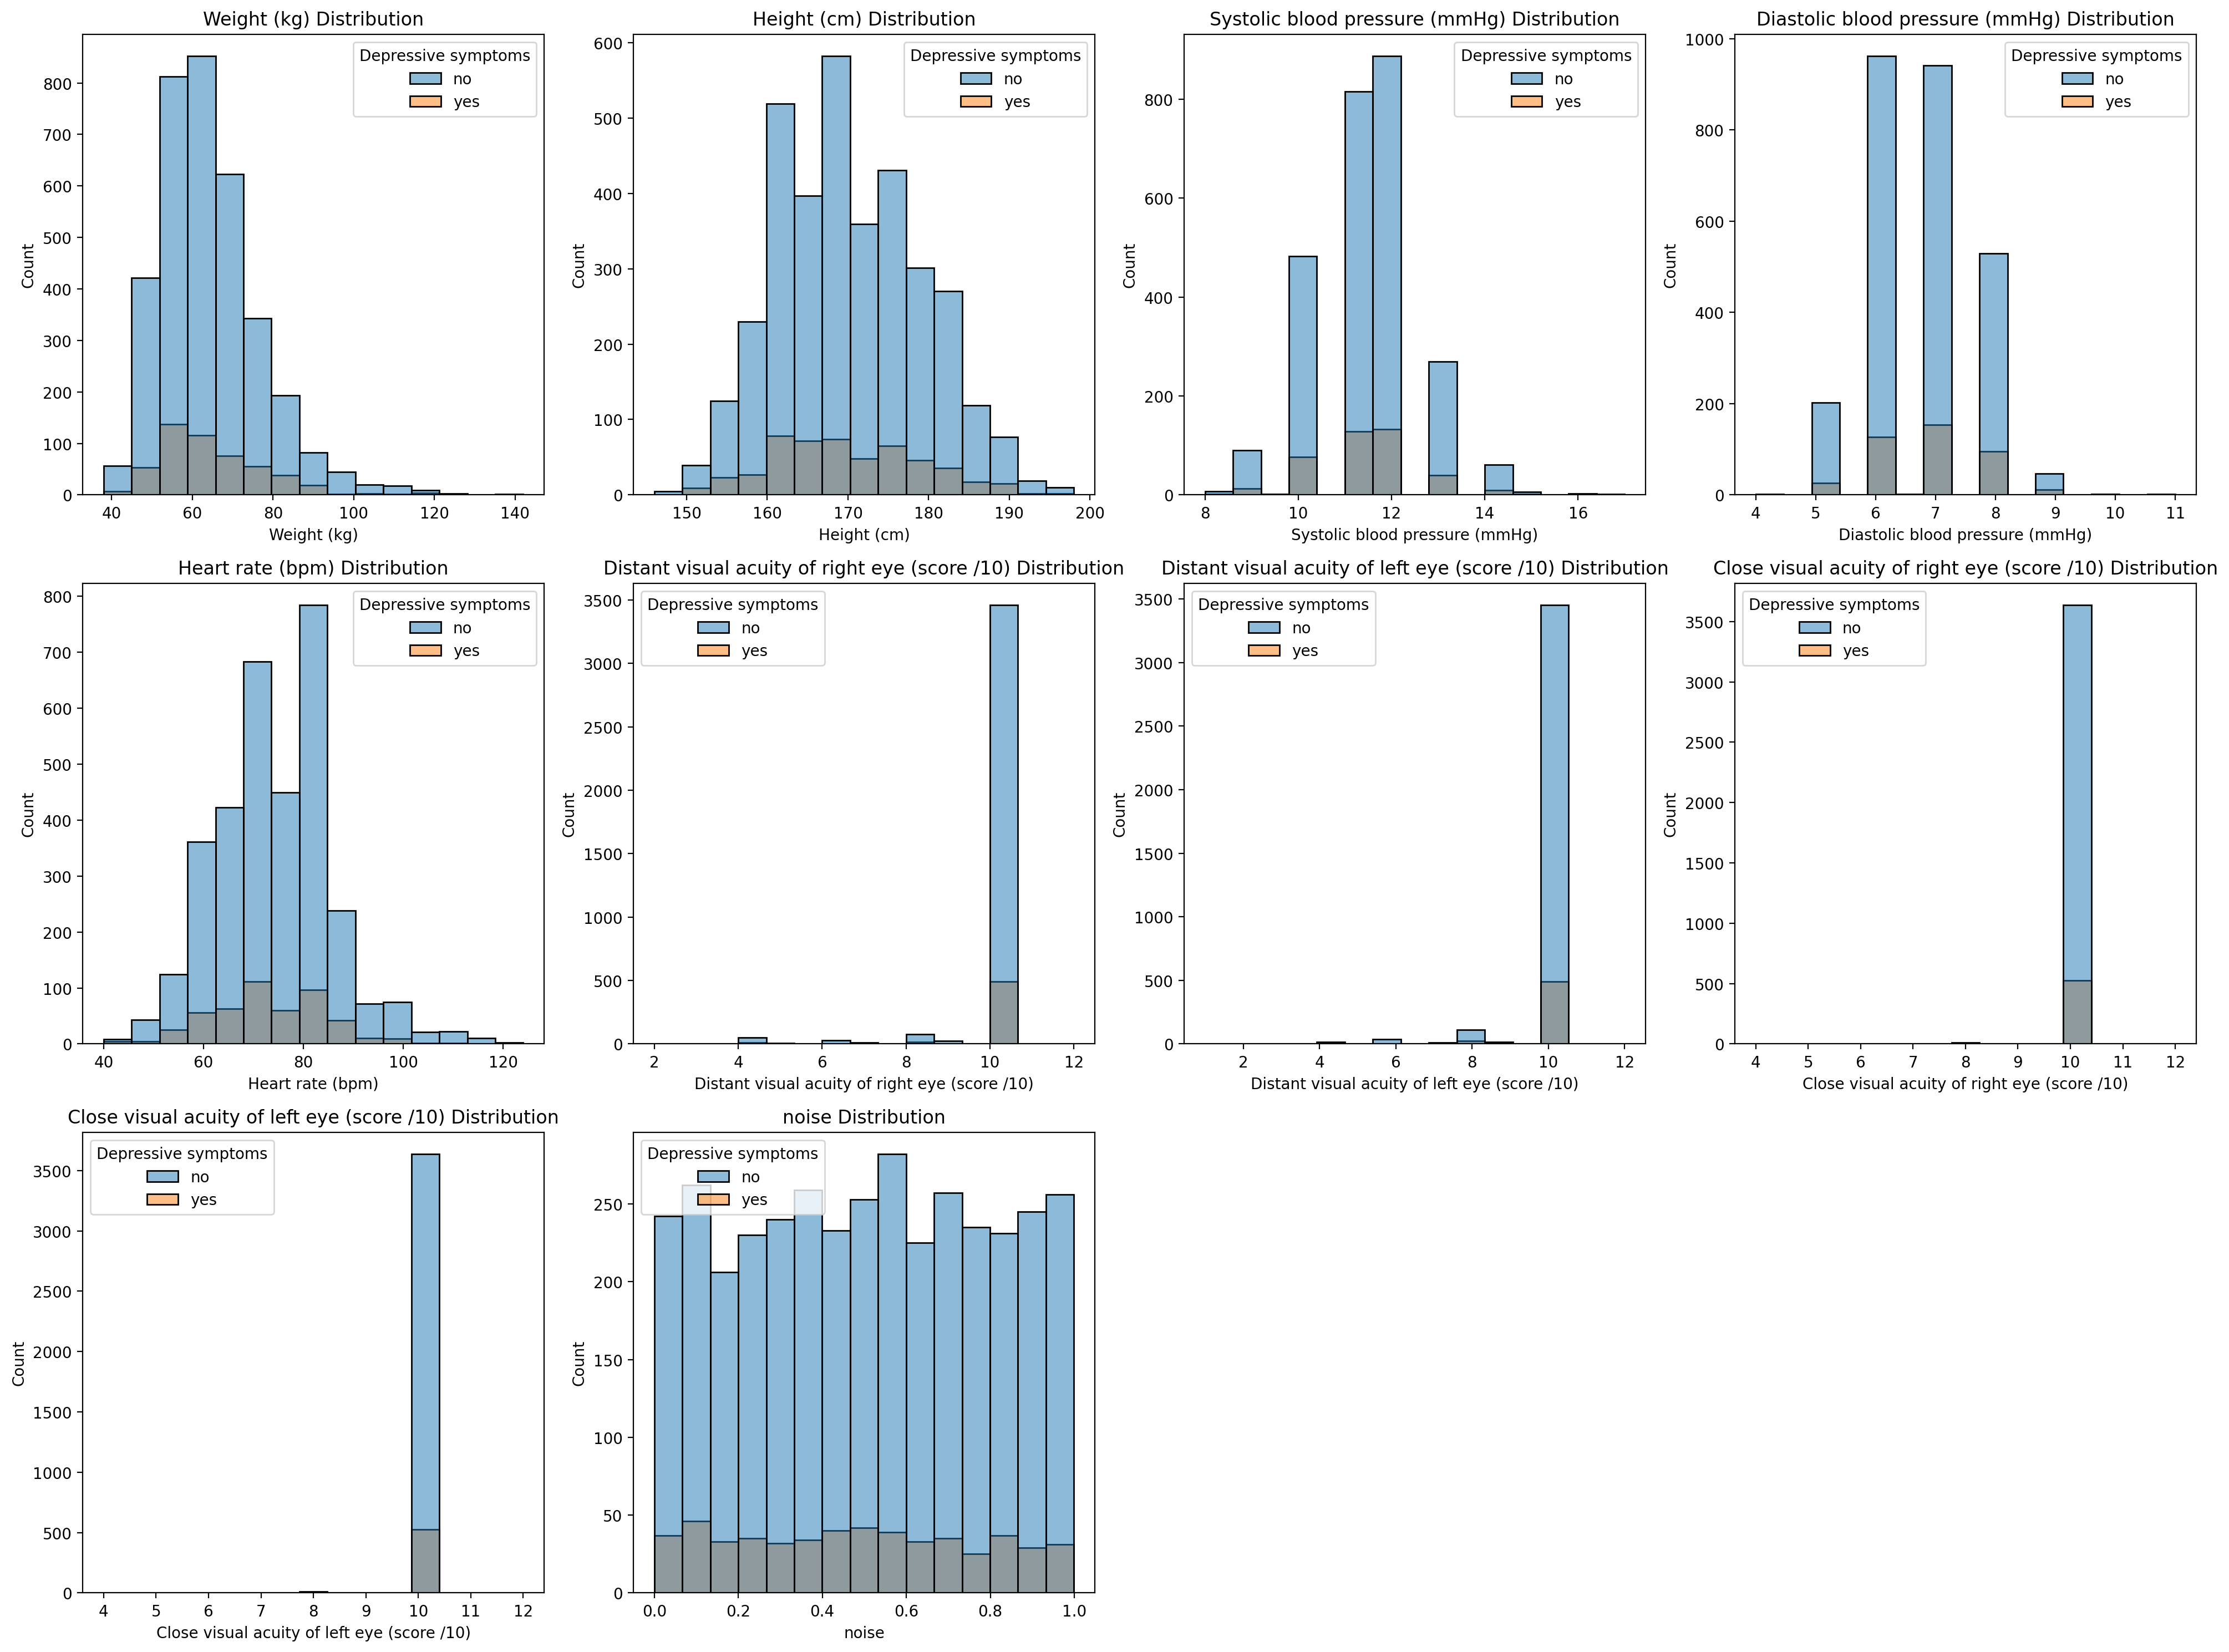

In [14]:
draw_histograms(df, num_cols, 3, 4, dtype = "Num", uni_bivariate = 2)

#### Univariate and Bivariate Distributions for Categorical Features
Checking the distributions of the categorical features to understand the data better. Several observations are made below:

Most categorical features in this data are binary.
"Urinalysis (Glycosuria)" has only one level. This type of feature won't add any value in model training, therefore we will remove this feature from the training data.
Some binary features such as "Decreased in close visual acuity" has the majority of the data in one level. This type of feature could cause convergence issues during model training. If needed, it will be removed from the training data as well.
All of these features will need to be encoded appropriately before modeling. Since the features havea maximum of 5 levels, one-hot encoding should work.

In [15]:
draw_histograms(df, cat_cols, 14, 4, "Cat", 2)

#### Summary Statistics of Univariate and Bivariate Distributions
- Weight, Height, Sysolic blood pressure, Diastolic blood pressure, Heart Rate all have some missing, although not many. The missing values will need to be taken care of for linear models.
- "Height" approximately follows a normal distribution with a mean of 70 and standard deviation of 12.71, or Norm(70, 12.71)
- "Sysolic blood pressure" - approximately Norm(11, 1.125)
- "Diastolic blood pressure" - approximately Norm(6.74, 0.94)
- "Heart Rate" - approximately Norm(73, 11.28)
- "Weight" has a slightly skewed distribution with a long right tail.
- all the vision related variables have a spike, meaning most of the observations have the same value.

In [6]:
df.describe()

Weight (kg)  Height (cm)  Systolic blood pressure (mmHg)  \
count  3994.000000  3997.000000                     3032.000000   
mean     64.105158   170.120090                       11.368206   
std      12.718453     9.062628                        1.125397   
min      38.000000   146.000000                        8.000000   
25%      55.000000   163.000000                       11.000000   
50%      62.000000   169.000000                       11.000000   
75%      70.000000   177.000000                       12.000000   
max     142.000000   198.000000                       17.000000   

       Diastolic blood pressure (mmHg)  Heart rate (bpm)  \
count                      3111.000000       3798.000000   
mean                          6.746030         73.649552   
std                           0.941977         11.282012   
min                           4.000000         40.000000   
25%                           6.000000         65.000000   
50%                           7.000000         73.000000   
75%                           7.000000         80.000000   
max                          11.000000        124.000000   

       Distant visual acuity of right eye (score /10)  \
count                                     4184.000000   
mean                                         9.803537   
std                                          0.936485   
min                                          2.000000   
25%                                         10.000000   
50%                                         10.000000   
75%                                         10.000000   
max                                         12.000000   

       Distant visual acuity of left eye (score /10)  \
count                                    4184.000000   
mean                                        9.832218   
std                                         0.795970   
min                                         1.000000   
25%                                        10.000000   
50%                                        10.000000   
75%                                        10.000000   
max                                        12.000000   

       Close visual acuity of right eye (score /10)  \
count                                   4184.000000   
mean                                       9.989723   
std                                        0.188453   
min                                        4.000000   
25%                                       10.000000   
50%                                       10.000000   
75%                                       10.000000   
max                                       12.000000   

       Close visual acuity of left eye (score /10)        noise  
count                                  4184.000000  4184.000000  
mean                                      9.989723     0.499841  
std                                       0.188453     0.287611  
min                                       4.000000     0.000119  
25%                                      10.000000     0.255551  
50%                                      10.000000     0.500743  
75%                                      10.000000     0.744422  
max                                      12.000000     0.999131

#### Correlational Analysis Using Cramer's V
In this section, I am going to 
1) calculate the Cramer's V coefficients

2) create a heatmap to represent the Cramer's V

In [80]:
%%capture --no-display  
def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (np.sqrt(stat/(obs*mini)))

rows= []
df_cat = df[cat_cols]
for var1 in df_cat:
    col = []
    for var2 in df_cat:
        cramers =cramers_V(df_cat[var1], df_cat[var2]) # Cramer's V test
        col.append(round(cramers,2))
    rows.append(col)
  
cramers_results = np.array(rows)
df_cramerV = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

<AxesSubplot:>

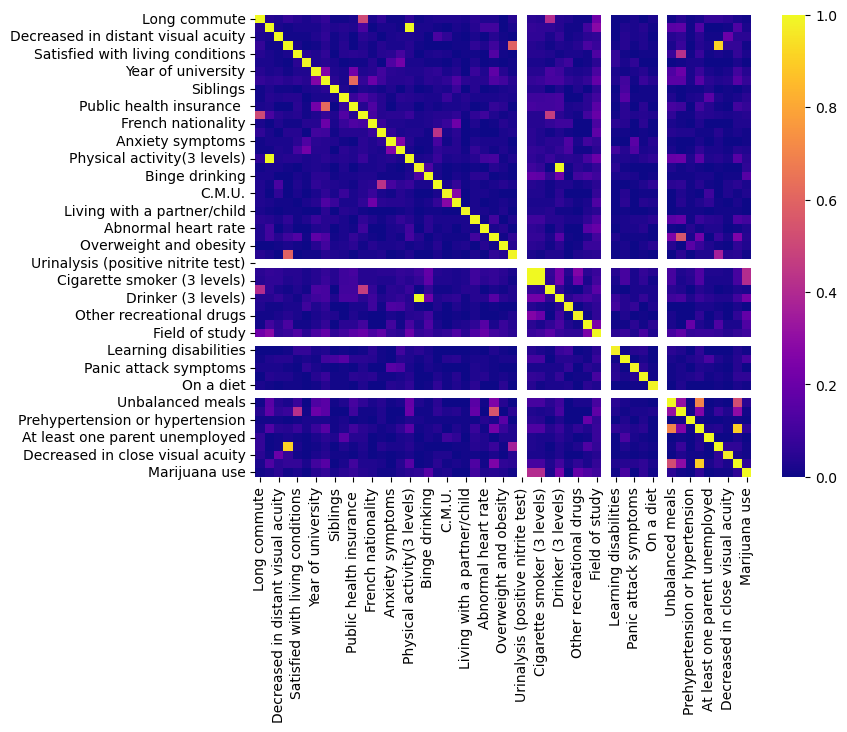

In [81]:
plt.figure(figsize = (8,6))
sns.heatmap(df_cramerV, cmap="plasma")

In [18]:
df.corr()

Weight (kg)  Height (cm)  \
Weight (kg)                                        1.000000     0.597709   
Height (cm)                                        0.597709     1.000000   
Systolic blood pressure (mmHg)                     0.373154     0.275386   
Diastolic blood pressure (mmHg)                    0.278749     0.177346   
Heart rate (bpm)                                  -0.015384    -0.137749   
Distant visual acuity of right eye (score /10)     0.004499     0.047023   
Distant visual acuity of left eye (score /10)     -0.002248     0.003411   
Close visual acuity of right eye (score /10)      -0.017098    -0.012580   
Close visual acuity of left eye (score /10)       -0.017098    -0.012580   
noise                                             -0.014590    -0.009370   

                                                Systolic blood pressure (mmHg)  \
Weight (kg)                                                           0.373154   
Height (cm)                                                           0.275386   
Systolic blood pressure (mmHg)                                        1.000000   
Diastolic blood pressure (mmHg)                                       0.653738   
Heart rate (bpm)                                                      0.139388   
Distant visual acuity of right eye (score /10)                        0.042727   
Distant visual acuity of left eye (score /10)                         0.018015   
Close visual acuity of right eye (score /10)                         -0.001609   
Close visual acuity of left eye (score /10)                          -0.001609   
noise                                                                -0.006797   

                                                Diastolic blood pressure (mmHg)  \
Weight (kg)                                                            0.278749   
Height (cm)                                                            0.177346   
Systolic blood pressure (mmHg)                                         0.653738   
Diastolic blood pressure (mmHg)                                        1.000000   
Heart rate (bpm)                                                       0.243968   
Distant visual acuity of right eye (score /10)                         0.021802   
Distant visual acuity of left eye (score /10)                          0.017169   
Close visual acuity of right eye (score /10)                          -0.013486   
Close visual acuity of left eye (score /10)                           -0.013486   
noise                                                                  0.016186   

                                                Heart rate (bpm)  \
Weight (kg)                                            -0.015384   
Height (cm)                                            -0.137749   
Systolic blood pressure (mmHg)                          0.139388   
Diastolic blood pressure (mmHg)                         0.243968   
Heart rate (bpm)                                        1.000000   
Distant visual acuity of right eye (score /10)         -0.013964   
Distant visual acuity of left eye (score /10)           0.004689   
Close visual acuity of right eye (score /10)           -0.023671   
Close visual acuity of left eye (score /10)            -0.023671   
noise                                                  -0.009009   

                                                Distant visual acuity of right eye (score /10)  \
Weight (kg)                                                                           0.004499   
Height (cm)                                                                           0.047023   
Systolic blood pressure (mmHg)                                                        0.042727   
Diastolic blood pressure (mmHg)                                                       0.021802   
Heart rate (bpm)                                                                     -0.013964   
Distant visual acuity of right eye (score /10)           

<AxesSubplot:>

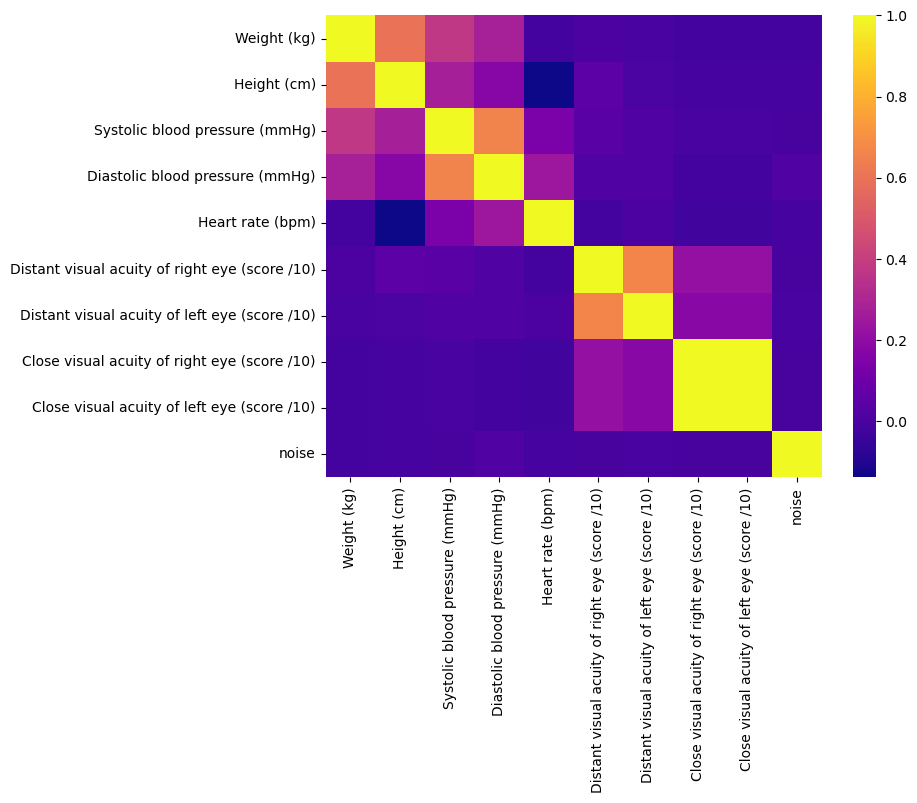

In [19]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = "plasma")

### Feature Engineering
Feature Engineering is an integral part of a machine learning project, as it allows for the selection, manipulation, and transformation of raw data into features that are able to be used in the machine learning model. process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

There are a variety of different ways to approach feature engineering: 

**Imputation**: This deals with missing data values, which are either deleted or replaced. 
- Numerical Imputation: This involves replacing missing numerical data values with most frequently the mean, median, or mode of a dataset. This can also involve removing the data point completely, but this decision depends on how many data points there are in the dataset. 
- Categorical Imputation: Missing categorical values are generally replaced by the most commonly occurring value in other records. 

**Discretization**: Discretization involves taking a set of values of data and grouping sets of them together in some logical fashion into bins (or buckets). Binning can apply to numerical values as well as to categorical values. This could help prevent data from overfitting but comes at the cost of loss of granularity of data. The data can be groupings of equal intervals, based on equal frequencies (of observations in the bin), or based on decision tree sorting (to establish a relationship with target). 

**Feature Creation**: Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features. As we saw above, the cost per sq. ft column was a feature creation.

**Transformations**: Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

**Feature Extraction**: Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.

**Exploratory Data Analysis**: Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.

**Benchmark**: A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It’s a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines, linear and non-linear classifiers, or different approaches like bagging and boosting. 

**Feature Splitting**: Splitting features into parts can sometimes improve the value of the features toward the target to be learned. For instance, in this case, Date better contributes to the target function than Date and Time. Becuase my project does not have a time or date related variable, there is no need for me to implement feature splitting as a feature engineering strategy.

https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

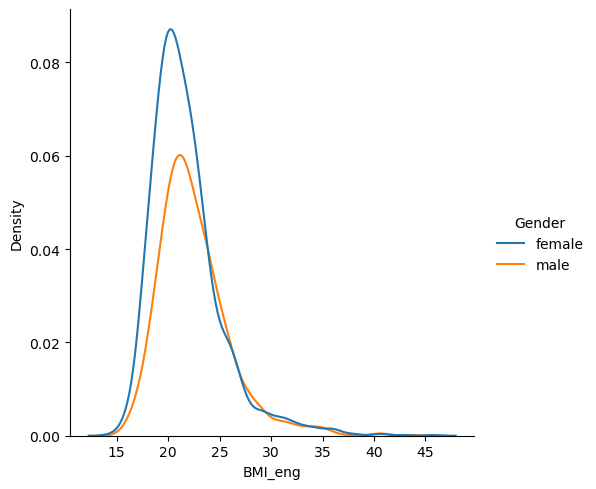

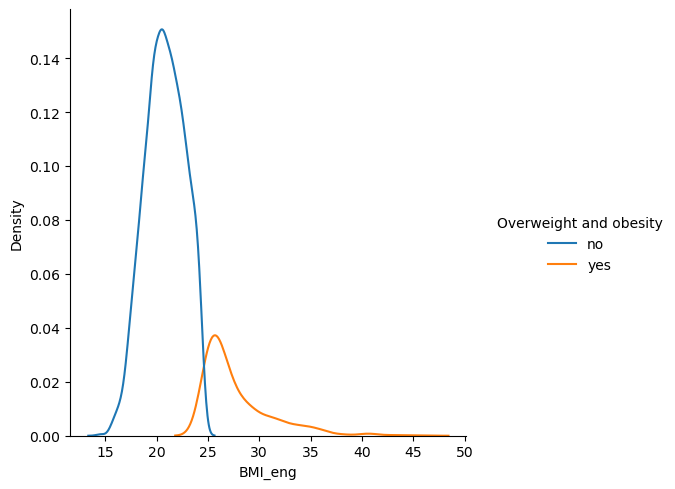

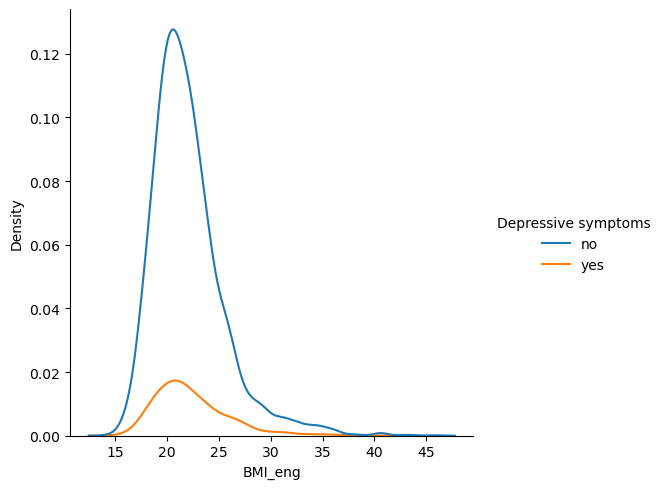

In [20]:
df['BMI_eng']=df['Weight (kg)']/(df['Height (cm)']/100)**2

sns.displot(data = df, x = df["BMI_eng"], hue = "Gender", kind = "kde")
sns.displot(data = df, x = df["BMI_eng"], hue = "Overweight and obesity", kind = "kde")
sns.displot(data = df, x = df["BMI_eng"], hue = "Depressive symptoms", kind = "kde")

#### Missing Value Imputation
**Imputation**: This deals with missing data values, which are either deleted or replaced. 
- Numerical Imputation: In my data specifically, I am going to replace the missing data values with the mean value of the variable (median, mode, etc. can also be used) because the variables with missing values have a relatively normal distribution. It would be a bad idea to delete the missing values entirely because the data set only has around 4000 data points, so I can not afford to lose any without dramatically affecting the outcome of the model. 

Most Python libraries don't handle missing values automatically. As a result errors can ocurr due to missing values.
Depending on the causes of missing values, they may cause bias in the data.
Missing values can lead to bias in the final model thus misleading results.
Last but not least, when data volume is not high, it is desired to restore the complete data by imputing those missing values.
Different techniques for missing value imputation:

- Impute with mean or median
- Impute with an arbitrary value
- Impute with mode
- Impute with end of tail value
- For this particular dataset, most of the numeric features with missing values have close to normal distributions; therefore we will impute the missing values with the median.

- Weight (kg): 62
- Height (cm): 169
- Systolic blood pressure (mmHg): 11
- Diastolic blood pressure (mmHg): 7
- Heart rate (bpm): 73

To check whether missing values happen at random, an indicator feature (1 = imputed, 0 = not imputed) was created for each of the 5 features with a suffix of _imputed: Weight_imputed, Height_imputed, Systolic_imputed, DIastolic_imputed, HeartRate_imputed.

In [21]:
vars_with_na = [var for var in df._get_numeric_data().columns if df._get_numeric_data()[var].isnull().sum() > 0]
print(vars_with_na)

['Weight (kg)', 'Height (cm)', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Heart rate (bpm)', 'BMI_eng']


In [22]:
for var in vars_with_na:
    var_name = var + "_imputed"
    df[var_name] = df[var].fillna(df[var].median())

df.drop(['Weight (kg)', 'Height (cm)', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Heart rate (bpm)', 'BMI_eng'], axis = 1, inplace = True)
# df["Weight_imputed"] = df["Weight (kg)"].isnull().astype(int)
# df["Weight (kg)"] = df["Weight (kg)"].fillna(df["Weight (kg)"].median())
    
# df["Height_imputed"] = df["Height (cm)"].isnull().astype(int)
# df["Height (cm)"] = df["Height (cm)"].fillna(df["Height (cm)"].median())

# df["Systolic_imputed"] = df["Systolic blood pressure (mmHg)"].isnull().astype(int)
# df["Systolic blood pressure (mmHg)"] = df["Systolic blood pressure (mmHg)"].fillna(df["Systolic blood pressure (mmHg)"].median())

# df["Diastolic_imputed"] = df["Diastolic blood pressure (mmHg)"].isnull().astype(int)
# df["Diastolic blood pressure (mmHg)"] = df["Diastolic blood pressure (mmHg)"].fillna(df["Diastolic blood pressure (mmHg)"].median())

# df["HeartRate_imputed"] = df["Heart rate (bpm)"].isnull().astype(int)
# df["Heart rate (bpm)"] = df["Heart rate (bpm)"].fillna(df["Heart rate (bpm)"].median())

In [23]:
df.describe()

Distant visual acuity of right eye (score /10)  \
count                                     4184.000000   
mean                                         9.803537   
std                                          0.936485   
min                                          2.000000   
25%                                         10.000000   
50%                                         10.000000   
75%                                         10.000000   
max                                         12.000000   

       Distant visual acuity of left eye (score /10)  \
count                                    4184.000000   
mean                                        9.832218   
std                                         0.795970   
min                                         1.000000   
25%                                        10.000000   
50%                                        10.000000   
75%                                        10.000000   
max                                        12.000000   

       Close visual acuity of right eye (score /10)  \
count                                   4184.000000   
mean                                       9.989723   
std                                        0.188453   
min                                        4.000000   
25%                                       10.000000   
50%                                       10.000000   
75%                                       10.000000   
max                                       12.000000   

       Close visual acuity of left eye (score /10)        noise  \
count                                  4184.000000  4184.000000   
mean                                      9.989723     0.499841   
std                                       0.188453     0.287611   
min                                       4.000000     0.000119   
25%                                      10.000000     0.255551   
50%                                      10.000000     0.500743   
75%                                      10.000000     0.744422   
max                                      12.000000     0.999131   

       Weight (kg)_imputed  Height (cm)_imputed  \
count          4184.000000          4184.000000   
mean             64.009560           170.070029   
std              12.433977             8.860764   
min              38.000000           146.000000   
25%              55.000000           163.000000   
50%              62.000000           169.000000   
75%              70.000000           176.000000   
max             142.000000           198.000000   

       Systolic blood pressure (mmHg)_imputed  \
count                             4184.000000   
mean                                11.266826   
std                                  0.971996   
min                                  8.000000   
25%                                 11.000000   
50%                                 11.000000   
75%                                 12.000000   
max                                 17.000000   

       Diastolic blood pressure (mmHg)_imputed  Heart rate (bpm)_imputed  \
count                              4184.000000               4184.000000   
mean                                  6.811162                 73.589627   
std                                   0.819764                 10.750517   
min                                   4.000000                 40.000000   
25%                                   6.000000                 66.000000   
50%                                   7.000000                 73.000000   
75%                                   7.000000                 80.000000   
max                                  11.000000                124.000000   

       BMI_eng_imputed  
count      4184.000000  
mean         22.033117  
std           3.407277  
min          14.479500  
25%          19.835163  
50%          21.453574  
75%          23.437500  
max          45.731707

**Categorical Encoding**: This includes methods like One-Hot Encoding (OHE) and Ordinal Encoding; it is the technique used to encode categorical features into numerical values which are usually simpler for an algorithm to understand.
OHE is where categorical values are converted into simple numerical 1’s and 0’s without the loss of information, while in ordinal encoding, each unique category value is assigned an integer value. 

Categorical features are non-numeric features that can often be characterized as categories or groups. A good example is Gender which normally has two levels: "Female" and "Male".



In [24]:
one_hot_cols = pd.get_dummies(df[cat_cols])
df_linear = df.copy()
df_linear = df_linear.drop(cat_cols, axis = 1)
df_linear = pd.concat([df_linear, one_hot_cols], axis = 1)
df_linear.head()

Distant visual acuity of right eye (score /10)  \
0                                              10   
1                                              10   
2                                              10   
3                                              10   
4                                              10   

   Distant visual acuity of left eye (score /10)  \
0                                             10   
1                                             10   
2                                             10   
3                                             10   
4                                             10   

   Close visual acuity of right eye (score /10)  \
0                                            10   
1                                            10   
2                                            10   
3                                            10   
4                                            10   

   Close visual acuity of left eye (score /10)     noise  Weight (kg)_imputed  \
0                                           10  0.741730                 62.0   
1                                           10  0.506725                 57.0   
2                                           10  0.242531                 62.0   
3                                           10  0.839125                 85.0   
4                                           10  0.464334                 41.0   

   Height (cm)_imputed  Systolic blood pressure (mmHg)_imputed  \
0                165.0                                    11.0   
1                170.0                                    10.0   
2                162.0                                    11.0   
3                193.0                                    11.0   
4                161.0                                    10.0   

   Diastolic blood pressure (mmHg)_imputed  Heart rate (bpm)_imputed  \
0                                      6.0                      75.0   
1                                      5.0                      65.0   
2                                      7.0                      65.0   
3                                      8.0                      70.0   
4                                      6.0                      73.0   

   BMI_eng_imputed  Long commute_no  Long commute_yes  \
0        22.773186                1                 0   
1        19.723183                0                 1   
2        21.453574                1                 0   
3        22.819405                1                 0   
4        15.817291                1                 0   

   Physical activity(2 levels)_no activity or occasionally  \
0                                                  0         
1                                                  0         
2                                                  1         
3                                                  1         
4                                                  1         

   Physical activity(2 levels)_regularly  \
0                                      1   
1                                      1   
2                                      0   
3                                      0   
4                                      0   

   Decreased in distant visual acuity_no  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      1   

   Decreased in distant visual acuity_yes  Abnormal urinalysis_no  \
0                                       0                       0   
1                                       0                       0   
2                                       0                       1   
3                                       0                       0   
4                                       0                       0   

   Abnormal urinalysis_yes  Satisfied with living conditions_no  \
0                  

In [25]:
from sklearn.preprocessing import LabelEncoder as le
le = le()
df.fillna("unknown", inplace = True)

df["Age (4 levels)"] = df["Age (4 levels)"].astype(str)

df_nonlinear = df.copy()

for col in cat_cols: 
    df_nonlinear.drop(col, axis = 1, inplace = True)
    print(col)
    le_col = le.fit_transform(df[col])
    df_nonlinear = pd.concat([df_nonlinear, pd.DataFrame(le_col, columns = [col])], axis = 1)
    mappings = {index: label for index, label in enumerate(le.classes_)}
    print(mappings)

Long commute
{0: 'no', 1: 'unknown', 2: 'yes'}
Physical activity(2 levels)
{0: 'no activity or occasionally', 1: 'regularly'}
Decreased in distant visual acuity
{0: 'no', 1: 'yes'}
Abnormal urinalysis
{0: 'no', 1: 'yes'}
Satisfied with living conditions
{0: 'no', 1: 'unknown', 2: 'yes'}
Difficulty memorizing lessons
{0: 'no', 1: 'yes'}
Year of university
{0: 'first', 1: 'second', 2: 'third'}
Age (4 levels)
{0: '18', 1: '19', 2: '20 and more', 3: 'less 18'}
Siblings
{0: 'no', 1: 'yes'}
Grant
{0: 'no', 1: 'yes'}
Public health insurance 
{0: 'no', 1: 'yes'}
Mode of transportation
{0: 'by car', 1: 'by public transportation', 2: 'on foot', 3: 'unknown'}
French nationality
{0: 'no', 1: 'yes'}
Vaccination up to date
{0: 'no', 1: 'unknown', 2: 'yes'}
Anxiety symptoms
{0: 'no', 1: 'yes'}
Depressive symptoms
{0: 'no', 1: 'yes'}
Physical activity(3 levels)
{0: 'no', 1: 'occasionally', 2: 'regularly'}
Drinker (2 levels)
{0: 'no or occasionally', 1: 'regularly to heavily', 2: 'unknown'}
Binge drink

In [26]:
for var in cat_cols:
    print(var)
    print(df_nonlinear[var].unique())

Long commute
[0 2 1]
Physical activity(2 levels)
[1 0]
Decreased in distant visual acuity
[0 1]
Abnormal urinalysis
[1 0]
Satisfied with living conditions
[2 0 1]
Difficulty memorizing lessons
[0 1]
Year of university
[1 0 2]
Age (4 levels)
[2 1 0 3]
Siblings
[1 0]
Grant
[1 0]
Public health insurance 
[1 0]
Mode of transportation
[2 1 0 3]
French nationality
[1 0]
Vaccination up to date
[1 2 0]
Anxiety symptoms
[0 1]
Depressive symptoms
[0 1]
Physical activity(3 levels)
[2 0 1]
Drinker (2 levels)
[0 1 2]
Binge drinking
[0 1]
Control examination needed
[1 0]
C.M.U.
[0 1]
Private health insurance 
[0 2 1]
Living with a partner/child
[0 1]
Eating junk food
[1 0]
Abnormal heart rate
[0 1 2]
Professional objective
[1 0]
Overweight and obesity
[0 1 2]
Urinalysis (hematuria)
[0 1]
Urinalysis (positive nitrite test)
[0]
Cigarette smoker (5 levels)
[2 4 5 3 0 1]
Cigarette smoker (3 levels)
[1 2 3 0]
Parental home
[0 2 1]
Drinker (3 levels)
[0 1 2 3]
Financial difficulties
[0 1]
Other recreation

### Modeling

#### Data partitioning

In [27]:
%%capture --no-display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
y = df["Depressive symptoms"]
y.replace(("yes", "no"), (1, 0), inplace = True)

X_linear = df_linear.drop(["Depressive symptoms_yes", "Depressive symptoms_no"], axis = 1)
# X_linear["noise"] = np.random.uniform(0,1, X_linear.shape[0]) #creating a noise variable

X_linear_train, X_linear_test, y_train, y_test = train_test_split(X_linear, y, random_state = 2022, test_size = 0.25)

In [29]:
X_linear_train.describe()

Distant visual acuity of right eye (score /10)  \
count                                     3138.000000   
mean                                         9.809433   
std                                          0.920500   
min                                          2.000000   
25%                                         10.000000   
50%                                         10.000000   
75%                                         10.000000   
max                                         12.000000   

       Distant visual acuity of left eye (score /10)  \
count                                    3138.000000   
mean                                        9.843531   
std                                         0.751192   
min                                         1.000000   
25%                                        10.000000   
50%                                        10.000000   
75%                                        10.000000   
max                                        10.000000   

       Close visual acuity of right eye (score /10)  \
count                                   3138.000000   
mean                                       9.990758   
std                                        0.182718   
min                                        4.000000   
25%                                       10.000000   
50%                                       10.000000   
75%                                       10.000000   
max                                       12.000000   

       Close visual acuity of left eye (score /10)        noise  \
count                                  3138.000000  3138.000000   
mean                                      9.990758     0.502781   
std                                       0.182718     0.287857   
min                                       4.000000     0.000119   
25%                                      10.000000     0.259473   
50%                                      10.000000     0.504503   
75%                                      10.000000     0.745678   
max                                      12.000000     0.999131   

       Weight (kg)_imputed  Height (cm)_imputed  \
count          3138.000000          3138.000000   
mean             64.195985           170.209369   
std              12.452735             8.845168   
min              38.000000           146.000000   
25%              56.000000           164.000000   
50%              62.000000           169.000000   
75%              70.000000           176.000000   
max             136.000000           198.000000   

       Systolic blood pressure (mmHg)_imputed  \
count                             3138.000000   
mean                                11.261377   
std                                  0.976380   
min                                  8.000000   
25%                                 11.000000   
50%                                 11.000000   
75%                                 12.000000   
max                                 17.000000   

       Diastolic blood pressure (mmHg)_imputed  Heart rate (bpm)_imputed  \
count                              3138.000000               3138.000000   
mean                                  6.806788                 73.559911   
std                                   0.812169                 10.666791   
min                                   4.000000                 40.000000   
25%                                   6.000000                 67.000000   
50%                                   7.000000                 73.000000   
75%                                   7.000000                 80.000000   
max                                  11.000000                121.000000   

       BMI_eng_imputed  Long commute_no  Long commute_yes  \
count      3138.000000      3138.000000       3138.000000   
mean         22.060213         0.429254          0.346399   
std           3.397813         0.495049          0.475898   
min          14.479500         0.000000          0.000000

In [30]:
X_nonlinear = df_nonlinear.drop(["Depressive symptoms"], axis = 1)
# X_nonlinear["noise"] = np.random.uniform(0,1, X_nonlinear.shape[0]) #creating a noise variable

X_nonlinear_train, X_nonlinear_test, y_train, y_test = train_test_split(X_nonlinear, y, random_state = 2022, test_size = 0.25)

X_nonlinear_train.describe()

Distant visual acuity of right eye (score /10)  \
count                                     3138.000000   
mean                                         9.809433   
std                                          0.920500   
min                                          2.000000   
25%                                         10.000000   
50%                                         10.000000   
75%                                         10.000000   
max                                         12.000000   

       Distant visual acuity of left eye (score /10)  \
count                                    3138.000000   
mean                                        9.843531   
std                                         0.751192   
min                                         1.000000   
25%                                        10.000000   
50%                                        10.000000   
75%                                        10.000000   
max                                        10.000000   

       Close visual acuity of right eye (score /10)  \
count                                   3138.000000   
mean                                       9.990758   
std                                        0.182718   
min                                        4.000000   
25%                                       10.000000   
50%                                       10.000000   
75%                                       10.000000   
max                                       12.000000   

       Close visual acuity of left eye (score /10)        noise  \
count                                  3138.000000  3138.000000   
mean                                      9.990758     0.502781   
std                                       0.182718     0.287857   
min                                       4.000000     0.000119   
25%                                      10.000000     0.259473   
50%                                      10.000000     0.504503   
75%                                      10.000000     0.745678   
max                                      12.000000     0.999131   

       Weight (kg)_imputed  Height (cm)_imputed  \
count          3138.000000          3138.000000   
mean             64.195985           170.209369   
std              12.452735             8.845168   
min              38.000000           146.000000   
25%              56.000000           164.000000   
50%              62.000000           169.000000   
75%              70.000000           176.000000   
max             136.000000           198.000000   

       Systolic blood pressure (mmHg)_imputed  \
count                             3138.000000   
mean                                11.261377   
std                                  0.976380   
min                                  8.000000   
25%                                 11.000000   
50%                                 11.000000   
75%                                 12.000000   
max                                 17.000000   

       Diastolic blood pressure (mmHg)_imputed  Heart rate (bpm)_imputed  \
count                              3138.000000               3138.000000   
mean                                  6.806788                 73.559911   
std                                   0.812169                 10.666791   
min                                   4.000000                 40.000000   
25%                                   6.000000                 67.000000   
50%                                   7.000000                 73.000000   
75%                                   7.000000                 80.000000   
max                                  11.000000                121.000000   

       BMI_eng_imputed  Long commute  Physical activity(2 levels)  \
count      3138.000000   3138.000000                  3138.000000   
mean         22.060213      0.917145                     0.399618   
std           3.397813      0.876945                     0.489898   
min          14.479500   

In [31]:
np.shape(X_nonlinear_train)

(3138, 63)

#### Feature Selection

                                              Name     Score
46                                  Field of study  0.000049
2     Close visual acuity of right eye (score /10)  0.003941
3      Close visual acuity of left eye (score /10)  0.003941
18                                  Age (4 levels)  0.010084
1    Distant visual acuity of left eye (score /10)  0.010783
19                                        Siblings  0.014938
0   Distant visual acuity of right eye (score /10)  0.015892
7           Systolic blood pressure (mmHg)_imputed  0.018854
62                                   Marijuana use  0.019352
23                              French nationality  0.021142
55                    Informed about opportunities  0.047209
12                     Physical activity(2 levels)  0.049996
32                     Living with a partner/child  0.059860
28                                  Binge drinking  0.083124
45                                          Gender  0.086275
44                      

<BarContainer object of 63 artists>

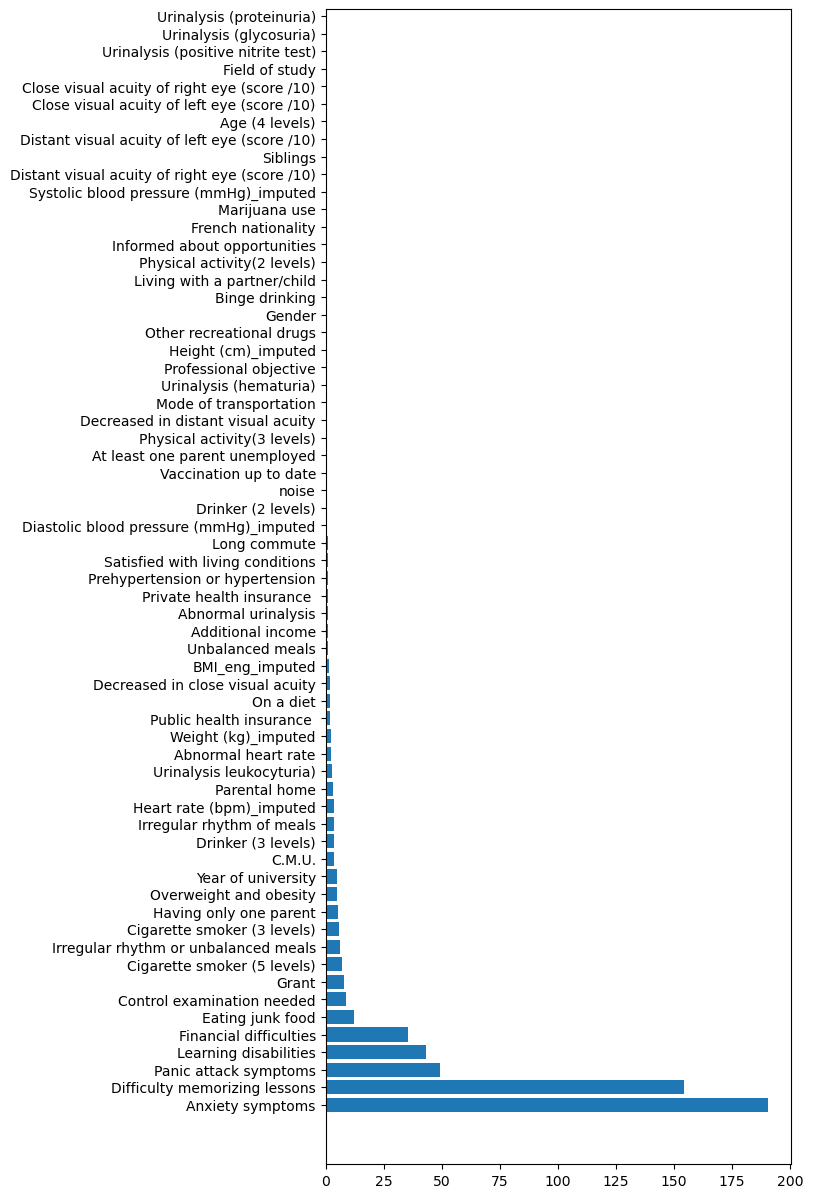

In [34]:
## univariate feature selection
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_nonlinear_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nonlinear_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name','Score']  #naming the dataframe columns
print(featureScores.nsmallest(40,'Score'))  #print 10 best features
fig=plt.figure(figsize = (6, 15), dpi = 100)
plt.barh(featureScores.nlargest(64, "Score")["Name"], featureScores.nlargest(64, "Score")["Score"])

In [35]:
## drop the features that are less predictive than "noise"
features_to_drop_1 = featureScores[featureScores["Score"]<= 0.05]["Name"]
features_to_drop_1
X_nonlinear_train = X_nonlinear_train.drop(columns = features_to_drop_1, axis = 1)
X_nonlinear_test = X_nonlinear_test.drop(columns = features_to_drop_1, axis = 1)

In [36]:
X_nonlinear_test.shape

(1046, 51)

In [38]:
## feature selection by feature importance - multivariate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

In [39]:
%%capture --no-display
model_GB = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.05, random_state=123) #1000 trees so we avoid overfitting
model_GB.fit(X_nonlinear_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                           random_state=123)

Tree Based Feaure Importance Attempt 1

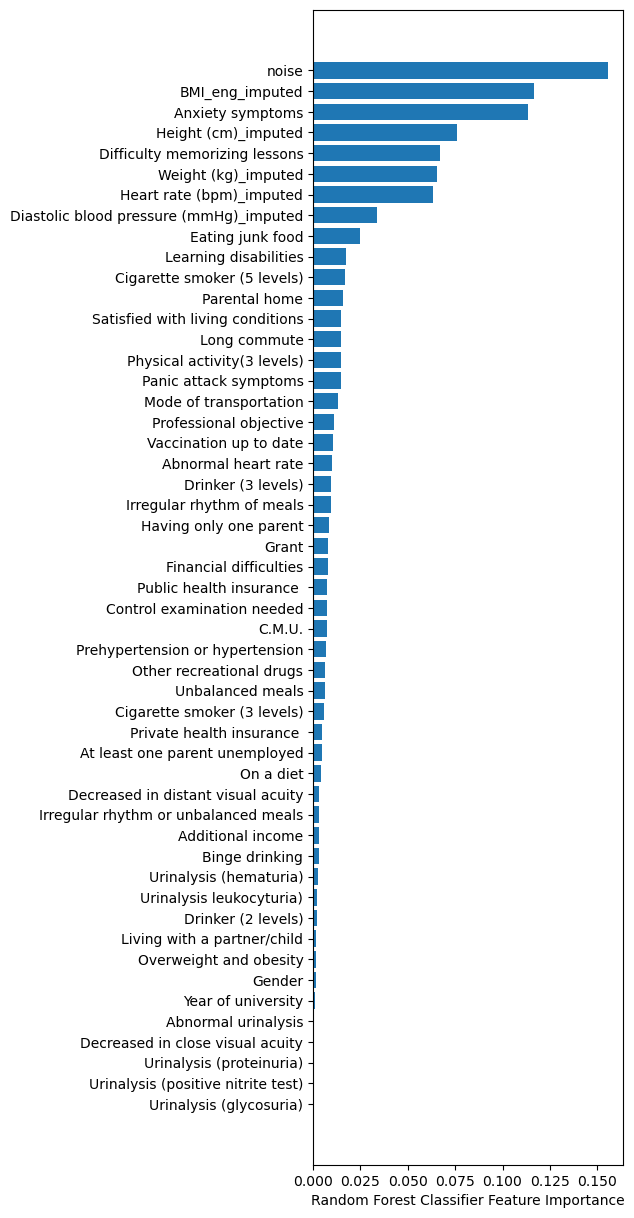

Specs     Score
0                                     noise  0.155833
1                       Weight (kg)_imputed  0.065519
2                       Height (cm)_imputed  0.075948
3   Diastolic blood pressure (mmHg)_imputed  0.033659
4                  Heart rate (bpm)_imputed  0.063232
5                           BMI_eng_imputed  0.116630
6                              Long commute  0.014774
7        Decreased in distant visual acuity  0.003332
8                       Abnormal urinalysis  0.000681
9          Satisfied with living conditions  0.014968
10            Difficulty memorizing lessons  0.067038
11                       Year of university  0.001202
12                                    Grant  0.008127
13                 Public health insurance   0.007599
14                   Mode of transportation  0.013354
15                   Vaccination up to date  0.010508
16                         Anxiety symptoms  0.113263
17              Physical activity(3 levels)  0.014506
18                       Drinker (2 levels)  0.002000
19                           Binge drinking  0.003115
20               Control examination needed  0.007390
21                                   C.M.U.  0.007204
22                Private health insurance   0.004872
23              Living with a partner/child  0.001717
24                         Eating junk food  0.024549
25                      Abnormal heart rate  0.009822
26                   Professional objective  0.011050
27                   Overweight and obesity  0.001696
28                   Urinalysis (hematuria)  0.002751
29       Urinalysis (positive nitrite test)  0.000000
30              Cigarette smoker (5 levels)  0.016873
31              Cigarette smoker (3 levels)  0.005601
32                            Parental home  0.015552
33                       Drinker (3 levels)  0.009658
34                   Financial difficulties  0.007652
35                 Other recreational drugs  0.006382
36                                   Gender  0.001302
37                  Urinalysis (glycosuria)  0.000000
38                    Learning disabilities  0.017167
39                   Having only one parent  0.008619
40                    Panic attack symptoms  0.014475
41                        Additional income  0.003230
42                                On a diet  0.004140
43                 Urinalysis (proteinuria)  0.000000
44                         Unbalanced meals  0.006273
45          Prehypertension or hypertension  0.007002
46     Irregular rhythm or unbalanced meals  0.003295
47           At least one parent unemployed  0.004780
48                 Urinalysis leukocyturia)  0.002078
49         Decreased in close visual acuity  0.000222
50                Irregular rhythm of meals  0.009361

In [42]:
## get tree based feature importance

sorted_index = model_GB.feature_importances_.argsort()
plt.figure(figsize = (4, 15), dpi = 100)
featureImportance = pd.concat([pd.DataFrame(X_nonlinear_train.columns), pd.DataFrame(model_GB.feature_importances_)], axis = 1)
featureImportance.columns = ['Specs','Score']

plt.barh(X_nonlinear_train.columns[sorted_index], model_GB.feature_importances_[sorted_index])
plt.xlabel("Random Forest Classifier Feature Importance")
plt.show()

featureImportance

In [43]:
score_permutation = permutation_importance(model_GB, X_nonlinear_train, y_train,n_repeats=30, random_state=123)
score_permutation

{'importances_mean': array([ 2.54302103e-02,  1.58274910e-02,  2.13299341e-02,  7.09581474e-03,
         1.92585511e-02,  2.40917782e-02,  3.21861058e-03,  5.31123858e-04,
        -2.23072020e-04,  4.34459316e-03,  1.21096240e-02,  1.80582112e-04,
         2.34756745e-03,  2.49628213e-03,  5.31123858e-04,  2.60250690e-03,
         2.85107287e-02,  2.33694498e-03,  2.97429361e-04,  1.34905460e-03,
         3.98342894e-03,  1.95453580e-03,  1.11536010e-03,  2.12449543e-05,
         4.88633949e-03,  1.00913533e-03,  2.32632250e-03, -2.44316975e-04,
         5.31123858e-04,  0.00000000e+00,  5.19439133e-03, -9.56022945e-05,
         4.51455279e-03,  3.17612067e-03,  1.06224772e-03,  2.22009773e-03,
         2.88931379e-03,  0.00000000e+00,  3.62226471e-03,  1.62523901e-03,
         3.50541746e-03,  2.23072020e-04,  5.41746335e-04,  0.00000000e+00,
         9.24155513e-04,  2.24134268e-03,  9.56022945e-05,  5.62991290e-04,
         1.52963671e-03,  5.31123858e-05,  2.27321011e-03]),
 'impor

Tree Based Feaure Importance Attempt 2

In [44]:
%%capture --no-display
model_GB_1 = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.02, random_state = 123, max_depth = 2)
model_GB_1.fit(X_nonlinear_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=2, n_estimators=200,
                           random_state=123)

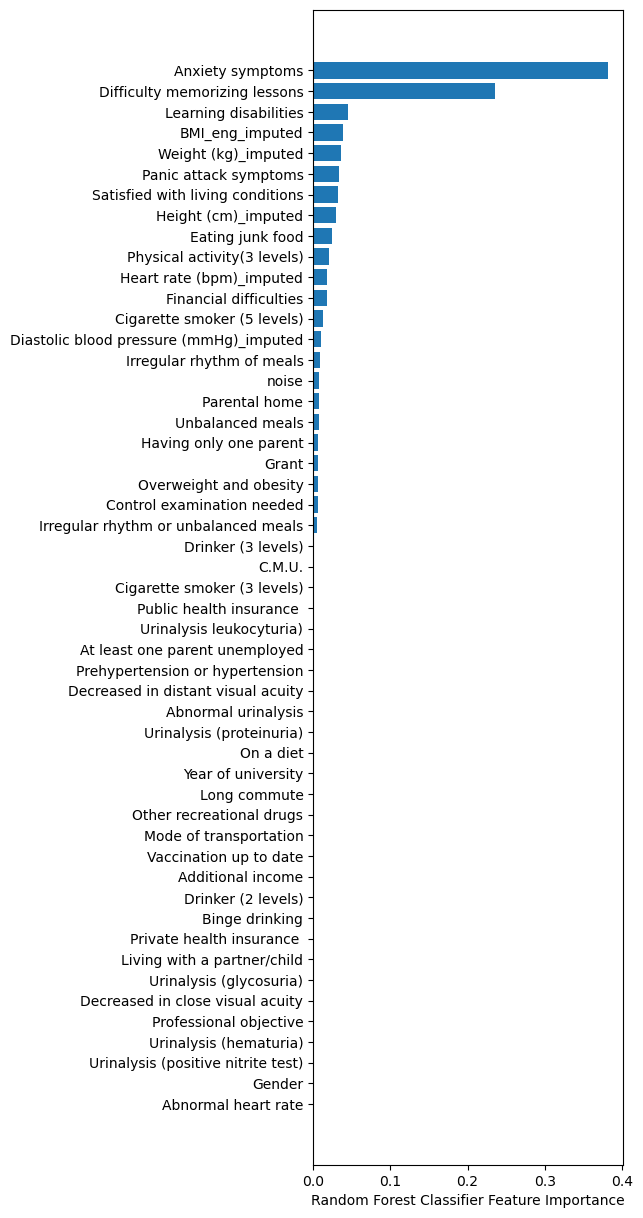

Specs     Score
0                                     noise  0.007699
1                       Weight (kg)_imputed  0.036132
2                       Height (cm)_imputed  0.029543
3   Diastolic blood pressure (mmHg)_imputed  0.009833
4                  Heart rate (bpm)_imputed  0.018195
5                           BMI_eng_imputed  0.038795
6                              Long commute  0.000000
7        Decreased in distant visual acuity  0.000000
8                       Abnormal urinalysis  0.000000
9          Satisfied with living conditions  0.031677
10            Difficulty memorizing lessons  0.235003
11                       Year of university  0.000000
12                                    Grant  0.005877
13                 Public health insurance   0.000422
14                   Mode of transportation  0.000000
15                   Vaccination up to date  0.000000
16                         Anxiety symptoms  0.382368
17              Physical activity(3 levels)  0.020148
18                       Drinker (2 levels)  0.000000
19                           Binge drinking  0.000000
20               Control examination needed  0.005815
21                                   C.M.U.  0.001239
22                Private health insurance   0.000000
23              Living with a partner/child  0.000000
24                         Eating junk food  0.023935
25                      Abnormal heart rate  0.000000
26                   Professional objective  0.000000
27                   Overweight and obesity  0.005838
28                   Urinalysis (hematuria)  0.000000
29       Urinalysis (positive nitrite test)  0.000000
30              Cigarette smoker (5 levels)  0.012967
31              Cigarette smoker (3 levels)  0.000984
32                            Parental home  0.007613
33                       Drinker (3 levels)  0.001763
34                   Financial difficulties  0.018006
35                 Other recreational drugs  0.000000
36                                   Gender  0.000000
37                  Urinalysis (glycosuria)  0.000000
38                    Learning disabilities  0.045682
39                   Having only one parent  0.006154
40                    Panic attack symptoms  0.033129
41                        Additional income  0.000000
42                                On a diet  0.000000
43                 Urinalysis (proteinuria)  0.000000
44                         Unbalanced meals  0.007486
45          Prehypertension or hypertension  0.000000
46     Irregular rhythm or unbalanced meals  0.004525
47           At least one parent unemployed  0.000000
48                 Urinalysis leukocyturia)  0.000000
49         Decreased in close visual acuity  0.000000
50                Irregular rhythm of meals  0.009170

In [45]:
sorted_index = model_GB_1.feature_importances_.argsort()
plt.figure(figsize = (4, 15), dpi = 100)
featureImportance = pd.concat([pd.DataFrame(X_nonlinear_train.columns), pd.DataFrame(model_GB_1.feature_importances_)], axis = 1)
featureImportance.columns = ['Specs','Score']

plt.barh(X_nonlinear_train.columns[sorted_index], model_GB_1.feature_importances_[sorted_index])
plt.xlabel("Random Forest Classifier Feature Importance")
plt.show()

featureImportance

In [46]:
from sklearn.inspection import permutation_importance

In [47]:
# get permutation importance for Gradient Boosting Classifier
score_permutation = permutation_importance(model_GB_1, X_nonlinear_train, y_train,n_repeats=100, random_state=123)

In [48]:
score_permutation


{'importances_mean': array([-1.49776928e-04,  7.10643722e-04,  3.76035692e-04, -4.14276609e-05,
         2.13511791e-04,  8.41300191e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.20203952e-03,  1.46972594e-02,  0.00000000e+00,
         9.56022945e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.87189293e-03,  2.47928617e-03,  0.00000000e+00,  0.00000000e+00,
        -9.24155513e-05,  6.37348630e-06,  0.00000000e+00,  0.00000000e+00,
         1.91204589e-05,  0.00000000e+00,  0.00000000e+00,  1.08349267e-04,
         0.00000000e+00,  0.00000000e+00,  7.04270236e-04,  0.00000000e+00,
         8.28553219e-05,  1.08349267e-04,  9.65583174e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.68005099e-04,  6.18228171e-04,
         7.42511154e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.96685787e-05,  0.00000000e+00, -1.37029955e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.15487572e-04]),
 'impor

  Shuffle/Permute
  - 

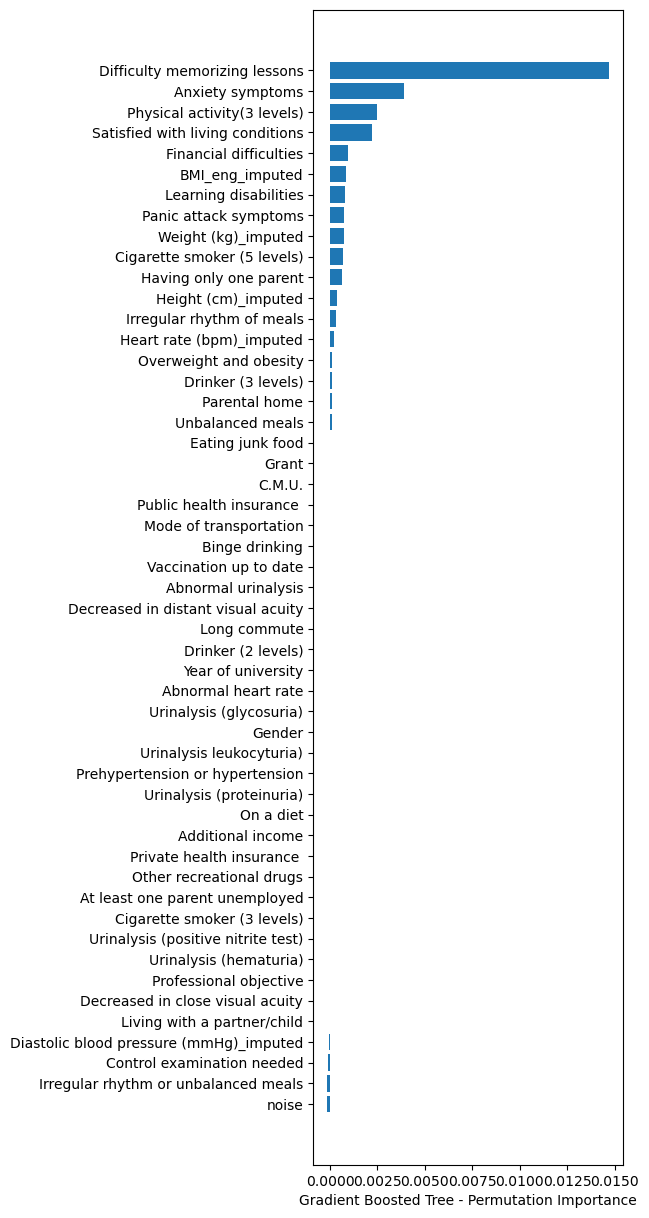

In [49]:
plt.figure(figsize = (4, 15), dpi = 100)
sorted_index = score_permutation.importances_mean.argsort()
plt.barh(X_nonlinear_train.columns[sorted_index], score_permutation.importances_mean[sorted_index])
plt.xlabel("Gradient Boosted Tree - Permutation Importance")
plt.show()

- see which features are most important to the model
- see how features compare in importance to eachother
feature selection
- univariatte feature selection (get rid of trivial variables before using multivariate) --> we used noise variable t determine
- many different ways to do bivariate feature selection
- tak emultivariate approach 
- lack of tuning of hyperparameters led to noiise being the most important (bc model itself is not effective)
    - why FIRE became appealing because it combiines advantages of diff types of models 
    - tree checks nonlinear

In [50]:
#concat two dataframes for better visualization 
# df_score_permutation = pd.concat([pd.DataFrame(X_nonlinear_train.columns),
#                                   pd.DataFrame(score_permutation.importances_mean)],
#                                  axis=1)
# df_score_permutation.columns = ['Name','Score']  #naming the dataframe columns
# sum_score_permutation = df_score_permutation["Score"].sum()
# df_score_permutation_sorted = df_score_permutation.sort_values(["Score"], ascending = False)
# df_score_permutation_sorted["cum_pct"] = df_score_permutation_sorted.cumsum()["Score"]/sum_score_permutation
# df_score_permutation_sorted

df_score_permutation = pd.concat([pd.DataFrame(X_nonlinear_train.columns),
                                  pd.DataFrame(score_permutation.importances_mean)],
                                  axis=1)
df_score_permutation.columns = ['Name', 'Score'] #naming the DataFrame columns
sum_score_permutation = df_score_permutation['Score'].sum()
df_score_permutation_sorted = df_score_permutation.sort_values(['Score'], ascending = False)
df_score_permutation_sorted['cum_pct'] = df_score_permutation_sorted.cumsum()['Score']/sum_score_permutation
df_score_permutation_sorted

Name     Score   cum_pct
10            Difficulty memorizing lessons  0.014697  0.498218
16                         Anxiety symptoms  0.003872  0.629470
17              Physical activity(3 levels)  0.002479  0.713514
9          Satisfied with living conditions  0.002202  0.788160
34                   Financial difficulties  0.000966  0.820892
5                           BMI_eng_imputed  0.000841  0.849411
38                    Learning disabilities  0.000768  0.875446
40                    Panic attack symptoms  0.000743  0.900616
1                       Weight (kg)_imputed  0.000711  0.924706
30              Cigarette smoker (5 levels)  0.000704  0.948579
39                   Having only one parent  0.000618  0.969537
2                       Height (cm)_imputed  0.000376  0.982284
50                Irregular rhythm of meals  0.000315  0.992978
4                  Heart rate (bpm)_imputed  0.000214  1.000216
33                       Drinker (3 levels)  0.000108  1.003889
27                   Overweight and obesity  0.000108  1.007562
32                            Parental home  0.000083  1.010371
44                         Unbalanced meals  0.000080  1.013071
24                         Eating junk food  0.000019  1.013719
12                                    Grant  0.000010  1.014043
21                                   C.M.U.  0.000006  1.014259
43                 Urinalysis (proteinuria)  0.000000  1.014259
49         Decreased in close visual acuity  0.000000  1.014259
35                 Other recreational drugs  0.000000  1.014259
37                  Urinalysis (glycosuria)  0.000000  1.014259
36                                   Gender  0.000000  1.014259
42                                On a diet  0.000000  1.014259
48                 Urinalysis leukocyturia)  0.000000  1.014259
47           At least one parent unemployed  0.000000  1.014259
45          Prehypertension or hypertension  0.000000  1.014259
41                        Additional income  0.000000  1.014259
25                      Abnormal heart rate  0.000000  1.014259
31              Cigarette smoker (3 levels)  0.000000  1.014259
29       Urinalysis (positive nitrite test)  0.000000  1.014259
6                              Long commute  0.000000  1.014259
7        Decreased in distant visual acuity  0.000000  1.014259
8                       Abnormal urinalysis  0.000000  1.014259
11                       Year of university  0.000000  1.014259
13                 Public health insurance   0.000000  1.014259
14                   Mode of transportation  0.000000  1.014259
15                   Vaccination up to date  0.000000  1.014259
18                       Drinker (2 levels)  0.000000  1.014259
19                           Binge drinking  0.000000  1.014259
22                Private health insurance   0.000000  1.014259
23              Living with a partner/child  0.000000  1.014259
26                   Professional objective  0.000000  1.014259
28                   Urinalysis (hematuria)  0.000000  1.014259
3   Diastolic blood pressure (mmHg)_imputed -0.000041  1.012855
20               Control examination needed -0.000092  1.009722
46     Irregular rhythm or unbalanced meals -0.000137  1.005077
0                                     noise -0.000150  1.000000

In [51]:
### features_to_drop_1 = featureScores[featureScores["Score"]<= 0.05]["Name"]
# features_to_drop_1
# X_nonlinear_train = X_nonlinear_train.drop(columns = features_to_drop_1, axis = 1)

features_to_drop_2 = df_score_permutation_sorted[df_score_permutation_sorted["cum_pct"]>= 0.99]["Name"]
features_to_drop_2
X_nonlinear_train = X_nonlinear_train.drop(columns = features_to_drop_2, axis = 1)
X_nonlinear_test = X_nonlinear_test.drop(columns = features_to_drop_2, axis = 1)

In [52]:
X_nonlinear_test.shape

(1046, 12)

In [53]:
X_nonlinear_train

Weight (kg)_imputed  Height (cm)_imputed  BMI_eng_imputed  \
2000                 72.0                180.0        22.222222   
4079                 60.0                166.0        21.773842   
379                  81.0                181.0        24.724520   
2151                 61.0                172.0        20.619254   
2677                 49.0                164.0        18.218322   
...                   ...                  ...              ...   
2849                 59.0                161.0        22.761468   
24                   70.0                181.0        21.366869   
2066                 83.0                178.0        26.196187   
173                  59.0                166.0        21.410945   
1244                 62.0                169.0        21.453574   

      Satisfied with living conditions  Difficulty memorizing lessons  \
2000                                 2                              0   
4079                                 2                              0   
379                                  2                              0   
2151                                 2                              0   
2677                                 2                              0   
...                                ...                            ...   
2849                                 2                              0   
24                                   2                              0   
2066                                 2                              0   
173                                  2                              0   
1244                                 0                              0   

      Anxiety symptoms  Physical activity(3 levels)  \
2000                 0                            2   
4079                 0                            2   
379                  0                            2   
2151                 0                            0   
2677                 0                            2   
...                ...                          ...   
2849                 0                            2   
24                   0                            1   
2066                 0                            2   
173                  0                            0   
1244                 1                            0   

      Cigarette smoker (5 levels)  Financial difficulties  \
2000                            0                       0   
4079                            2                       0   
379                             2                       0   
2151                            2                       0   
2677                            2                       0   
...                           ...                     ...   
2849                            2                       0   
24                              4                       0   
2066                            4                       0   
173                             2                       0   
1244                            2                       0   

      Learning disabilities  Having only one parent  Panic attack symptoms  
2000                      0                       0                      0  
4079                      0                       2                      0  
379                       0                       0                      0  
2151                      0                       0                      0  
2677                      0                       2                      0  
...                     ...                     ...                    ...  
2849                      0                       2                      0  
24                        0                       1                      0  
2066                      0                       0                      0  
173                       0                       0                      0  
1244                      0                       0                      0  

[3138

In [54]:
np.shape(X_nonlinear_train)

(3138, 12)

In [55]:
### train linear model

In [56]:
#### prepare the training data for the linear models
#### drop the features from nonlinear feature selection
    
for col in X_linear_train.columns:
    for x in features_to_drop_1:
        if col.__contains__(x):
            print(col)
            X_linear_train = X_linear_train.drop(col, axis = 1)
            X_linear_test = X_linear_test.drop(col, axis = 1)
            break
            
for col in X_linear_train.columns:
    for x in features_to_drop_2:
        if col.__contains__(x):
            print(col)
            X_linear_train = X_linear_train.drop(col, axis = 1)
            X_linear_test = X_linear_test.drop(col, axis = 1)
            break

Distant visual acuity of right eye (score /10)
Distant visual acuity of left eye (score /10)
Close visual acuity of right eye (score /10)
Close visual acuity of left eye (score /10)
Systolic blood pressure (mmHg)_imputed
Physical activity(2 levels)_no activity or occasionally
Physical activity(2 levels)_regularly
Age (4 levels)_18
Age (4 levels)_19
Age (4 levels)_20 and more
Age (4 levels)_less 18
Siblings_no
Siblings_yes
French nationality_no
French nationality_yes
Field of study_humanities
Field of study_law and political sciences
Field of study_medicine and allied programs
Field of study_other programs
Field of study_sciences
Field of study_sports science
Informed about opportunities_no
Informed about opportunities_yes
Marijuana use_no
Marijuana use_yes
noise
Diastolic blood pressure (mmHg)_imputed
Heart rate (bpm)_imputed
Long commute_no
Long commute_yes
Decreased in distant visual acuity_no
Decreased in distant visual acuity_yes
Abnormal urinalysis_no
Abnormal urinalysis_yes
Year 

In [57]:
X_linear_train.columns

Index(['Weight (kg)_imputed', 'Height (cm)_imputed', 'BMI_eng_imputed',
       'Satisfied with living conditions_no',
       'Satisfied with living conditions_yes',
       'Difficulty memorizing lessons_no', 'Difficulty memorizing lessons_yes',
       'Anxiety symptoms_no', 'Anxiety symptoms_yes',
       'Physical activity(3 levels)_no',
       'Physical activity(3 levels)_occasionally',
       'Physical activity(3 levels)_regularly',
       'Cigarette smoker (5 levels)_frequently',
       'Cigarette smoker (5 levels)_heavily', 'Cigarette smoker (5 levels)_no',
       'Cigarette smoker (5 levels)_occasionally',
       'Cigarette smoker (5 levels)_regularly', 'Financial difficulties_no',
       'Financial difficulties_yes', 'Learning disabilities_no',
       'Learning disabilities_yes', 'Having only one parent_no',
       'Having only one parent_yes', 'Panic attack symptoms_no',
       'Panic attack symptoms_yes'],
      dtype='object')

In [58]:
np.shape(X_linear_train)

(3138, 25)

In [59]:
from sklearn.linear_model import LogisticRegression 
model_lr = LogisticRegression()
model_lr.fit(X_linear_train, y_train)

/Users/kellylao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
model_lr.coef_

array([[ 0.00835225, -0.00136507,  0.00618559,  1.0107027 ,  0.29593778,
        -1.1168883 ,  1.13095208, -0.79411536,  0.80817913,  0.12153279,
        -0.21508881,  0.10761979,  0.8037704 ,  0.02080863,  0.21082822,
         0.10306669,  0.55610272, -0.40484639,  0.41891017, -0.61020682,
         0.62427059,  0.05564297,  0.14217368, -0.51941127,  0.53347505]])

In [61]:
model_lr.intercept_

array([0.01444356])

#### Next lets define a function to evaluate model performance
- lift chart: shows the effectiveness of the model, i.e. how well the model deferentiates low vs higher risks; and goodness of fit, i.e., how well the model fit the data. It is created by: sorting model predictions from low to high; then creating n equal size bins; calculating the average prediction and average actual for each bin; plotting the average prediction and average actual vs bins.
- ROC curve: plot True Positive Rate (TP/(TP + FN))) +  vs False Positive Rate (FP/(FP + TN)). It shows the trade-off between TPR (aka sensitivity) and FPR (aka 1 - specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- AUC: area under ROC curve. A perfect model has an AUC of 1.0.
- F1 score: harmonic mean of recall and precision

In [62]:
# define a function to plot a lift chart
def plot_lift_chart(data, y_hat, y_act, n_bins):
    data["bin"] = pd.qcut(data[y_hat], n_bins, labels= False)
    y_hat_avg = data.groupby("bin")[y_hat].mean()
    y_act_avg = data.groupby("bin")[y_act].mean()

    
#     fig = plt.figure(figsize = (5,3), dpi = 120)
    plt.xticks(np.arange(1,n_bins+1))
#     xlim(0, n_bins)
    plt.grid()
    
    y_hat_avg.plot()
    y_act_avg.plot()

    plt.title("predicted vs actual")
    plt.xlabel("bins")
    plt.ylabel("average predicted vs actual")
    

In [63]:
##### Define a function to: 1) fit a model on traning data; 2) get predictions on test data; 
##### 3) collect various metrics: Logloss, AUC, F1 score, precision(positive predictive value), 
##### recall (sensitivity or true positive rate)

def evaluate_model_performance(model, X_test, y_test, threshold):
    # get the raw prediction: predicted probability
    from sklearn import metrics
    try:
        prob_pred = model.predict_proba(X_test) 
    except:
        try:
            prob_pred = model.predict(X_test) 
        except:
            prob_pred = model.predict(DMatrix(X_test))
    
    # generate the lift chart
    try:
        y_pred = pd.DataFrame(data = prob_pred[:,1], columns = ["y_hat"], index = X_test.index.copy())
    except:
        y_pred = pd.DataFrame(data = prob_pred, columns = ["y_hat"], index = X_test.index.copy())
        
    y_pred_actual = pd.merge(y_test, y_pred, how ='left', left_index=True, right_index=True)
    plot_lift_chart(y_pred_actual, "y_hat", "Depressive symptoms", 10)
    plt.show()
    
    # convert probability prediction to binary labels: 1 if > threshold; else 0
    y_test_pred = pd.DataFrame(prob_pred).applymap(lambda x: 1 if x > threshold else 0)
    
    # plot ROC curve and get AUC under ROC
    from sklearn.metrics import roc_curve
    try:
        fpr, tpr, thresholds = roc_curve(y_test, prob_pred[:, 1])
    except:
        fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
    
#     fig = plt.figure(figsize = (4, 4), dpi = 120)
    plt.plot(fpr, tpr, color = 'green')
    plt.plot(fpr, fpr, color = 'gray')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    # confusion matrix
    
    # generate additional metrics
    try:
        result_metrics={"logloss": metrics.log_loss(y_test, prob_pred[:,1]), 
                        "AUC": metrics.auc(fpr, tpr),
                        "Accuracy": metrics.accuracy_score(y_test, y_test_pred.iloc[:, 1]),
                        "F1 score": metrics.f1_score(y_test, y_test_pred.iloc[:, 1]),
                       }
    except:
        result_metrics={"logloss": metrics.log_loss(y_test, prob_pred), 
                        "AUC": metrics.auc(fpr, tpr),
                        "Accuracy": metrics.accuracy_score(y_test, y_test_pred),
                        "F1 score": metrics.f1_score(y_test, y_test_pred),
                       }
    return result_metrics

In [64]:
y_hat = model_lr.predict_proba(X_linear_test)


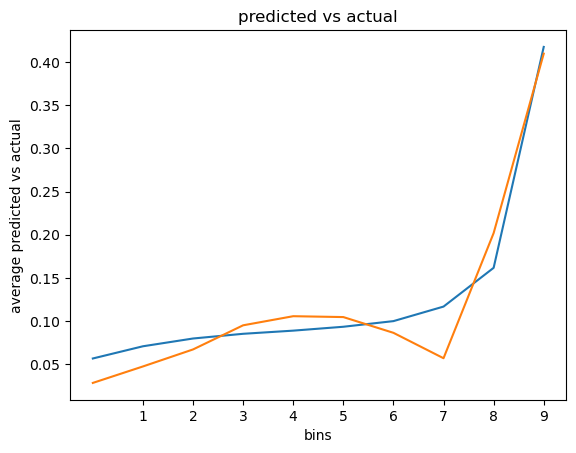

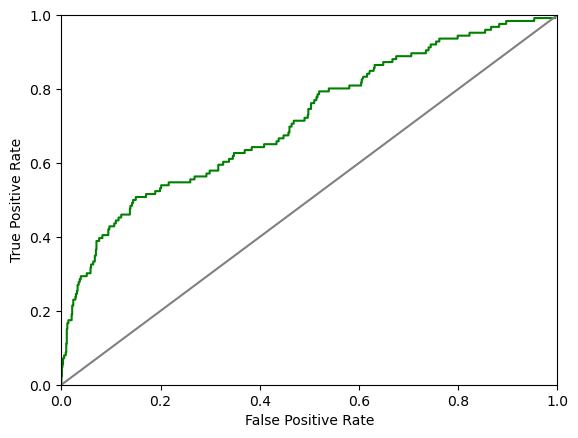

{'logloss': 0.3229307847967345,
 'AUC': 0.7145962732919253,
 'Accuracy': 0.7973231357552581,
 'F1 score': 0.37647058823529406}

In [65]:
evaluate_model_performance(model_lr, X_linear_test, y_test, 0.126195)

In [66]:
%%capture --no-display
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 1000, criterion = "gini", max_depth = 8, 
                                  max_features = int(np.sqrt(X_nonlinear_train.shape[1])))
model_rf.fit(X_nonlinear_train, y_train)

RandomForestClassifier(max_depth=8, max_features=3, n_estimators=1000)

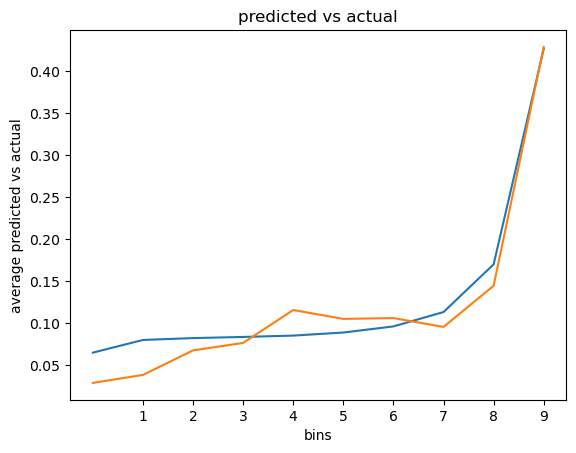

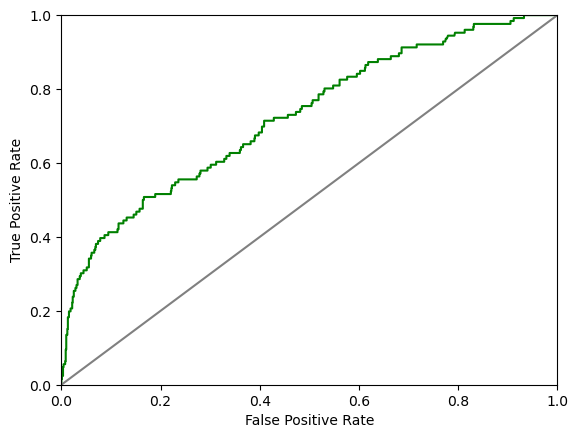

{'logloss': 0.32341052374047663,
 'AUC': 0.7248878536922015,
 'Accuracy': 0.7925430210325047,
 'F1 score': 0.3560830860534125}

In [67]:
evaluate_model_performance(model_rf, X_nonlinear_test, y_test, 0.126195)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.025, max_depth = 1, random_state = 123)
model_gbm.fit(X_nonlinear_train, y_train)

GradientBoostingClassifier(learning_rate=0.025, max_depth=1, n_estimators=1000,
                           random_state=123)

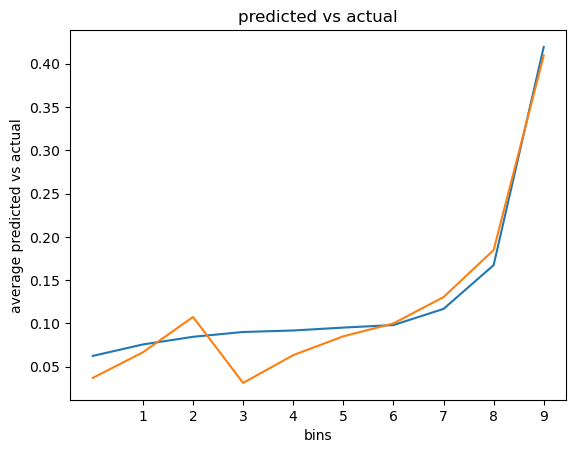

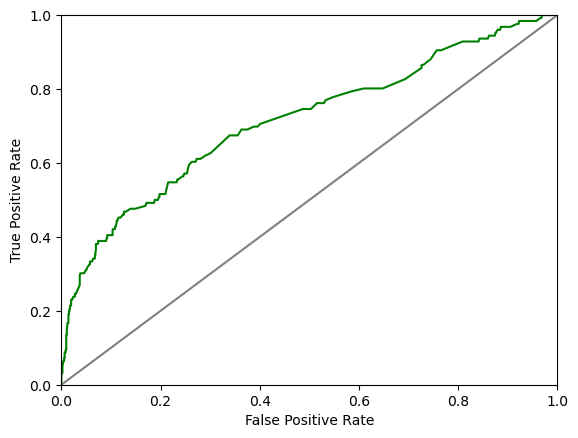

{'logloss': 0.3231714568066482,
 'AUC': 0.7139492753623189,
 'Accuracy': 0.7810707456978967,
 'F1 score': 0.3512747875354108}

In [69]:
evaluate_model_performance(model_gbm, X_nonlinear_test, y_test, 0.126195)

In [70]:
!pip install xgboost

In [71]:
import xgboost as xgb

# param = {'max_depth': 5, 'eta': 0.5, 'objective': 'binary:logistic', }
# param['nthread'] = 4
# param['eval_metric'] = 'logloss'

# dtrain = xgb.DMatrix(X_nonlinear_train, label=y_train)
# dtest = xgb.DMatrix(X_nonlinear_test, label=y_test)
# evallist = [(dtrain, 'train'), (dtest, 'eval')]

# num_round = 10
# model_xgb = xgb.train(param, dtrain, num_round, evallist)
XGBClassifier = xgb.XGBClassifier(n_estimators=500, reg_lambda=1, gamma=0.2, max_depth=1)
model_xgb = XGBClassifier.fit(X_nonlinear_train, y_train)

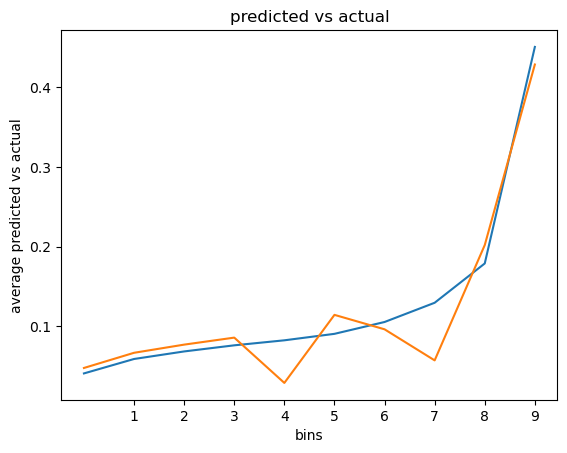

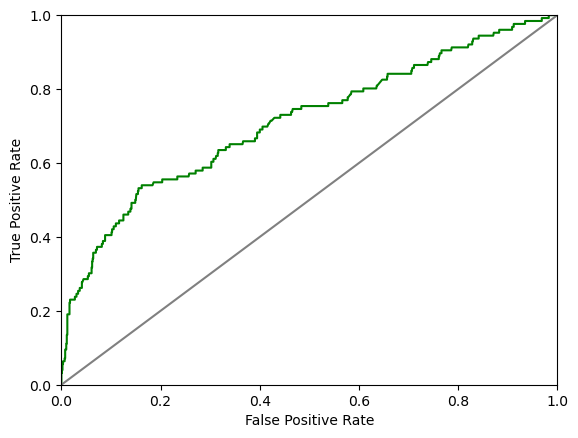

{'logloss': 0.32362563259502175,
 'AUC': 0.7112707039337475,
 'Accuracy': 0.7533460803059273,
 'F1 score': 0.3517587939698492}

In [72]:
evaluate_model_performance(model_xgb, X_nonlinear_test, y_test, 0.126195)

### Model Intepretation

In [73]:
!pip install shap 

In [74]:
import shap
shap.__version__
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_nonlinear_train)
np.shape(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(3138, 12)

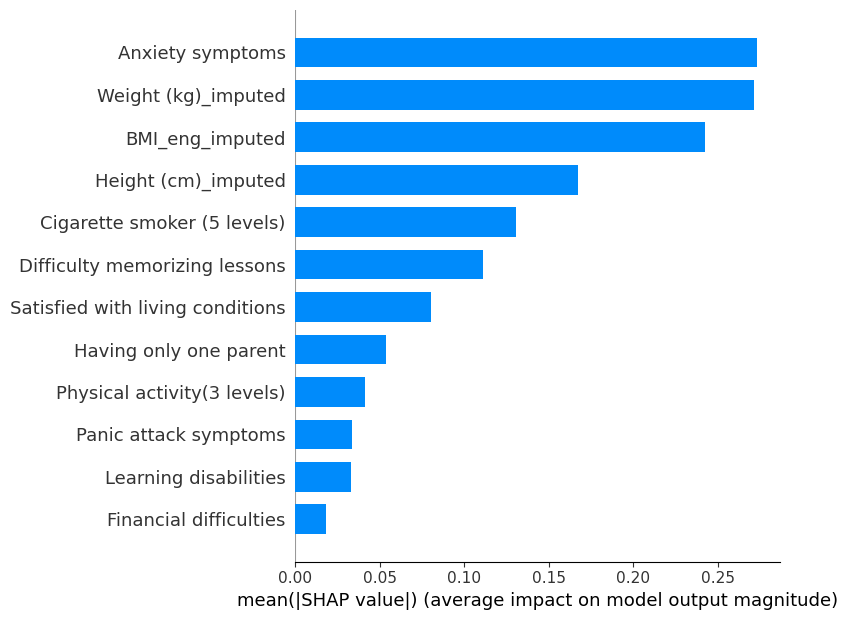

In [75]:
#Feature Importance
shap.summary_plot(shap_values, X_nonlinear_train, plot_type = "bar", max_display=64)

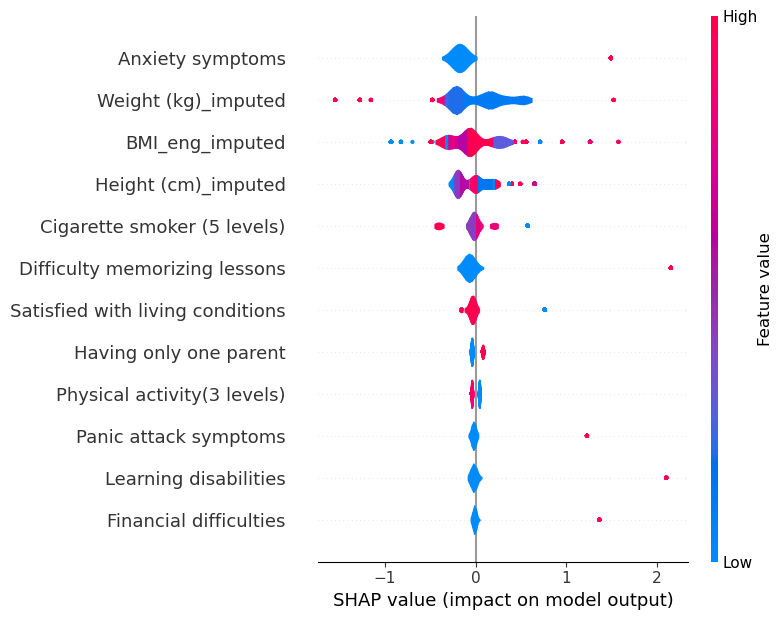

In [76]:
shap.summary_plot(shap_values, X_nonlinear_train, plot_type="violin", max_display = 64)

### Model Comparison

### Conclusion

In [77]:
import sklearn
print(sklearn.__version__)

1.2.1


In [78]:
!pip install streamlit

In [9]:
!pip install nbconvert[webpdf]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.7 MB/s eta 0:00:00


In [10]:
!pip install pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33262 sha256=eeff9e64bc7bf75a09c48c81cf5445e939340358d071104294e7ef98facda22a
  Stored in directory: /Users/kellylao/Library/Caches/pip/wheels/69/e6/a1/1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
